<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Table of Contents:
            </span>   
        </font>    
</h2>
<span style='font-family:Georgia'>
    <ol>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#libraries'>Getting Jupyter Ready</a></li>
        <li><a href='#import'>Reading & Understanding the data</a></li>
        <ol>
            <li><a href='#input'>Importing the input files</a></li>
            <li><a href='#inspect'>Inspect Data Frames</a></li>
        </ol>
        <li><a href='#clean'>Data Cleaning & Manipulation</a></li>
        <ol>
            <li><a href='#null'>Null Value Calculation</a></li>
            <li><a href='#clean1'>Analyze & Delete Unnecessary Columns in applicationDF</a></li>
            <li><a href='#clean2'>Analyze & Delete Unnecessary Columns in previousDF</a></li>
            <li><a href='#stdval'>Standardize Values</a></li>
            <li><a href='#dconv'>Data Type Conversion</a></li>
            <li><a href='#impute'>Null Value Data Imputation</a></li>
            <li><a href='#outlier'>Identifying the outliers</a></li>
        </ol>
        <li><a href='#analysis'>Data Analysis</a></li>
        <ol>
            <li><a href='#imbalance'>Imbalance Analysis</a></li>
            <li><a href='#pltfunc'>Plotting Functions</a></li>
            <li><a href='#catvar'>Categorical Variables Analysis</a></li>
            <li><a href='#numvar'>Numeric Variables Analysis</a></li>
        </ol>
        <li><a href='#merge'>Merged Dataframes Analysis</a></li>
        <li><a href='#conclusion'>Conclusions</a></li>
    </ol>
</span>
    

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
    </span>
</p>   
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.<br>
        When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    </span>
</p>
<ul>
    <span style='font-family:Georgia'>
        <li>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company</li>
        <li>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.</li>
    </span>
</ul>
    
<p><span style='font-family:Georgia'>The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:</span></p>
<ul>
    <span style='font-family:Georgia'> 
        <li><b>The client with payment difficulties:</b> he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample</li>
        <li><b>All other cases:</b> All other cases when the payment is paid on time</li>
    </span>
</ul>
    
<p><span style='font-family:Georgia'>When a client applies for a loan, there are four types of decisions that could be taken by the client/company):</span></p>

<ol>
    <span style='font-family:Georgia'>
        <li><b>Approved:</b> The Company has approved loan Application</li>
        <li><b>Cancelled:</b> The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.</li>
        <li><b>Refused:</b> The company had rejected the loan (because the client does not meet their requirements etc.)</li>
        <li><b>Unused offer:</b>  Loan has been cancelled by the client but on different stages of the process.</li>
    </span>
</ol>
<hr>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Business Objective:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.<br>
        In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
    </span>
</p>

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

In [968]:
!pip install missingno

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [969]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Supress Warnings:
            </span>   
        </font>    
</h3>

In [970]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [971]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### Helper Functions

##### transform_emp_duration

This function transforms the string value of employee's tenure into numeric value. If the value of null, then it imputes 0 for the tenure.

In [972]:
def transform_emp_duration(duration):
    if (pd.isnull(duration)):
        return 0
    duration = duration.strip()
    if duration == '< 1 year':
        return 0
    if duration == '10+ years':
        return 10
    return int(duration.split()[0])

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [973]:
loan_df = pd.read_csv('loan.csv')

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Inspect Data Frames
            </span>   
        </font>    
</h3>

In [974]:
# Database dimension
print("Database dimension     :",loan_df.shape)

#Database size
print("Database size          :",loan_df.size)

Database dimension     : (39717, 111)
Database size          : 4408587


In [975]:
# Checking the numeric variables of the dataframes
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleaning & Manipulation
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1 Duplicate Rows Check
            </span>   
        </font>    
</h3>

In [976]:
# Check for duplicate rows in the dataset.
# id column is used to check if the rows are duplicate
duplicate_rows=loan_df[loan_df.duplicated(['id'])]
print("Number of duplicate rows: ", len(duplicate_rows))

Number of duplicate rows:  0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There are no duplicate rows in the dataset
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2 Null Value Calculation
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.1 Loan Dataframe Missing Values
            </span>   
        </font>    
</h4>

<AxesSubplot:>

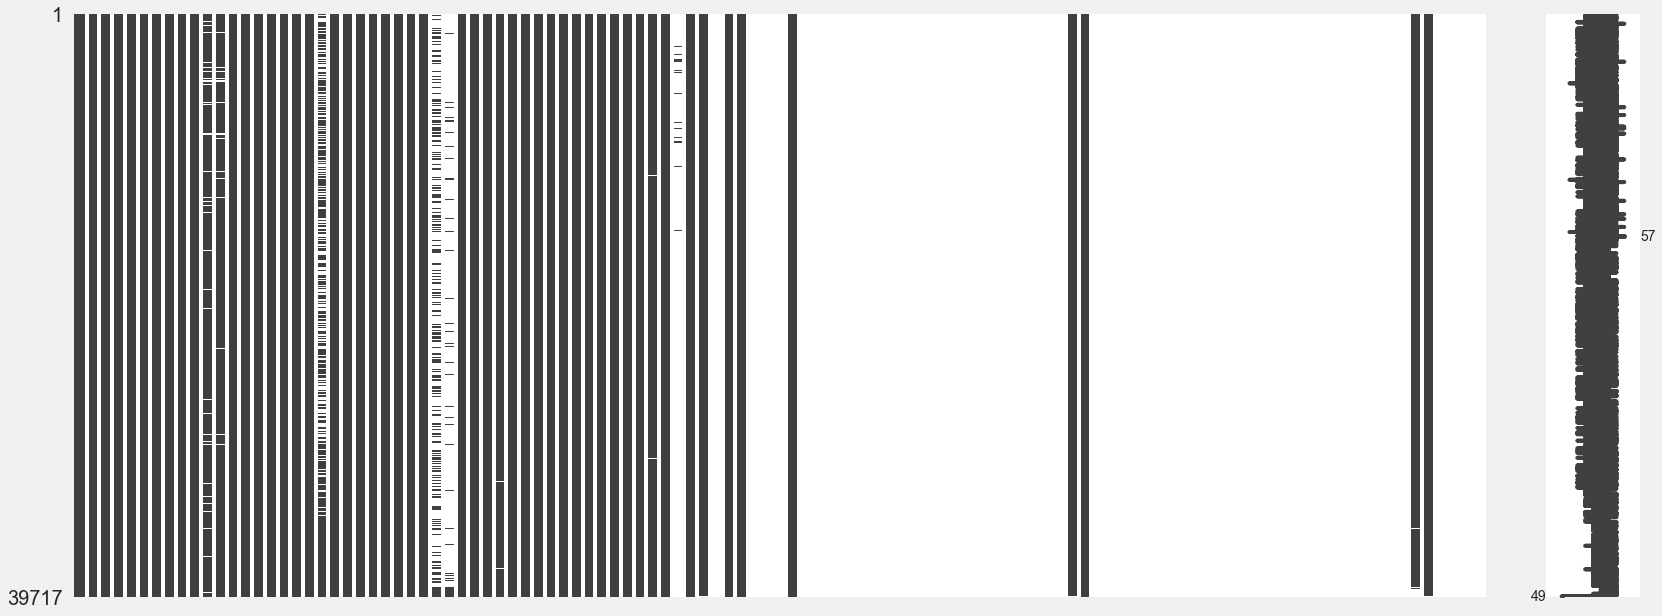

In [977]:
import missingno as mn
mn.matrix(loan_df)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Based on the above Matrix, it is evidednt that the dataset has many missing values. Let's check for each column what is the % of missing values
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.2 Rows with all null values
            </span>   
        </font>    
</h4>

In [978]:
# Number of rows which have all missing values
loan_df.isnull().all(axis=1).sum()

0

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There are 0 empty rows or rows having all the values as null in the entire dataset
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.3 Columns with all null values
            </span>   
        </font>    
</h4>

In [979]:
# Number of columns through sum function which have missing values
loan_df.isnull().all(axis=0).sum()

54

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There are 54 empty columns or columns having all the values as null in the entire dataset. So we will drop these columns where all values are null as these won't add any value in our analysis
    </span>    
</div>

In [980]:
# List the columns with 100% null values and drop those column from the dataset
drop_columns = col_null_values_percentage[col_null_values_percentage == 100.00].index
loan_df = loan_df.drop(columns=drop_columns)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>After dropping these 54 columns we are now left with 57 columns which has to be analyzed
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.3 Analyze & Delete Unnecessary Columns in data frame
            </span>   
        </font>    
</h3>

In [981]:
# Drop the columns which are irrelevant for the analysis

irrelevant_columns=['desc', 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d',
                    'member_id', 'url', 'emp_title', 'zip_code', 'tax_liens',
                    'pymnt_plan','title','initial_list_status','out_prncp','out_prncp_inv',
                    'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq',
                    'chargeoff_within_12_mths','delinq_amnt'
                   ]
loan_df = loan_df.drop(columns=irrelevant_columns)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>After dropping these irrelevant columns we are now left with 37 columns which has to be analyzed
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.4 Standardize Values
            </span>   
        </font>    
</h3>

In [982]:
# Extracting digits from Employee's length column i.e. Employee's Tenure.This variable will add value in our analysis
# If the tenure is less than 1 year, then the value will be 0
# If the tenure is more than 10 years, then the value will be 10
loan_df['emp_length']=loan_df.emp_length.apply(transform_emp_duration)
loan_df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [983]:
# Clean the pub_rec_bankruptcies column as it will be used in analysis
print('Total number of null values before cleaning pub_rec_bankruptcies')
print(loan_df.pub_rec_bankruptcies.isnull().sum())

# Replacing the 'Not Known' with NA values
loan_df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

print('Total number of null values after cleaning pub_rec_bankruptcies')
print(loan_df.pub_rec_bankruptcies.isnull().sum())


Total number of null values before cleaning pub_rec_bankruptcies
697
Total number of null values after cleaning pub_rec_bankruptcies
0


In [984]:
# During the data manipulation and cleaning phase, a step involves removing the percentage symbol from the interest rate column to facilitate its further analysis.
loan_df['int_rate']=loan_df['int_rate'].str.rstrip('%')

# step is implemented to eliminate the percentage symbol from the 'revol_util' column, enabling its use for further analysis.
loan_df['revol_util']=loan_df['revol_util'].str.rstrip('%')

In [985]:
# Converting columns to numeric data as these values will be used in data modeling and plotting
numeric_columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_df[columns1]=loan_df[numeric_columns].apply(pd.to_numeric)

In [986]:
loan_df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [987]:
# Excluding the 'current' customers as they are not necessary for the determination of driving factors.
loan_df = loan_df[loan_df.loan_status != "Current"]

In [988]:
print("Shape of the data frame :",loan_df.shape)

Shape of the data frame : (38577, 37)


In [989]:
# Delete rows containing either 50% or more than 50% NaN Values
perc = 50.0 # Here N is 50
min_count =  int(((100-perc)/100)*loan_df.shape[1] + 1)
print("rows containing either 50% or more than 50% NaN Values :", min_count)

rows containing either 50% or more than 50% NaN Values : 19


In [990]:
modified_df = loan_df.dropna( axis=0, thresh=min_count)

In [991]:
(modified_df.loan_status.value_counts()*100)/len(mod_df)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [992]:
# Calculating the percentages of different 'loan_status' categories in relation to the total number of issued loans.
loan_df = modified_df
(loan_df.loan_status.value_counts()*100)/len(loan_df)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [993]:
# Convert revol_util to numeric data type
loan_df.revol_util = pd.to_numeric(loan_df.revol_util)

In [994]:
# Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.5 Outlier Identification & Removal
            </span>   
        </font>    
</h3>

Box Plot helps in identifying the outliers

##### Annual Income

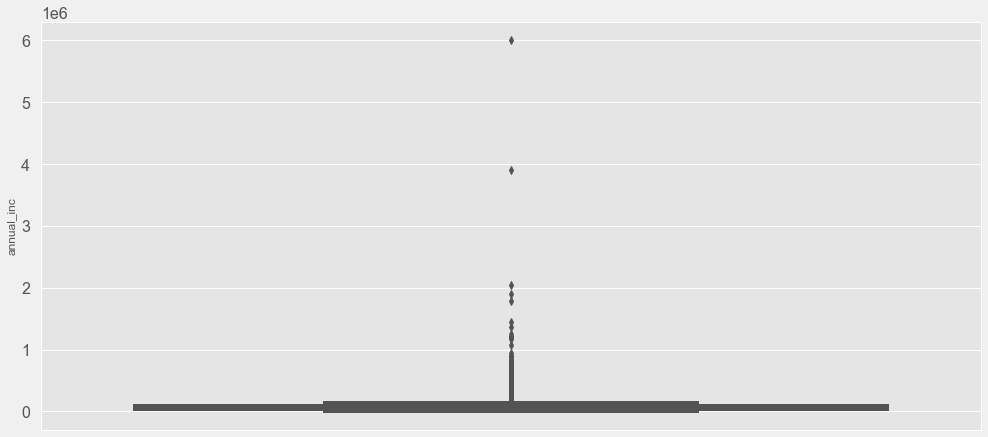

In [995]:
# Drawing Boxplot for Annual Income
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(y=loan_df.annual_inc)

In [996]:
quant_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. There are outliers, so we need to remove those<br>
        2. Let's take a threshold of 95 percentile
    </span>    
</div>

In [997]:
# Statistics for Quantitative Variables

print('Before removing Outliers from Annual Income :\n')
print(loan_df['annual_inc'].describe(),'\n')

# Removing Outliers where Quantile >= 0.95 

loan_df=loan_df[loan_df["annual_inc"]< loan_df["annual_inc"].quantile(0.95)]

print('After removing outliers from annual Income:\n')
print(loan_df["annual_inc"].describe())

Before removing Outliers from Annual Income :

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 

After removing outliers from annual Income:

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64


In [998]:
quant_info = loan_df["annual_inc"].quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

0.50     56000.00
0.75     77704.05
0.90    100000.00
0.95    117000.00
0.99    135000.00
Name: annual_inc, dtype: float64

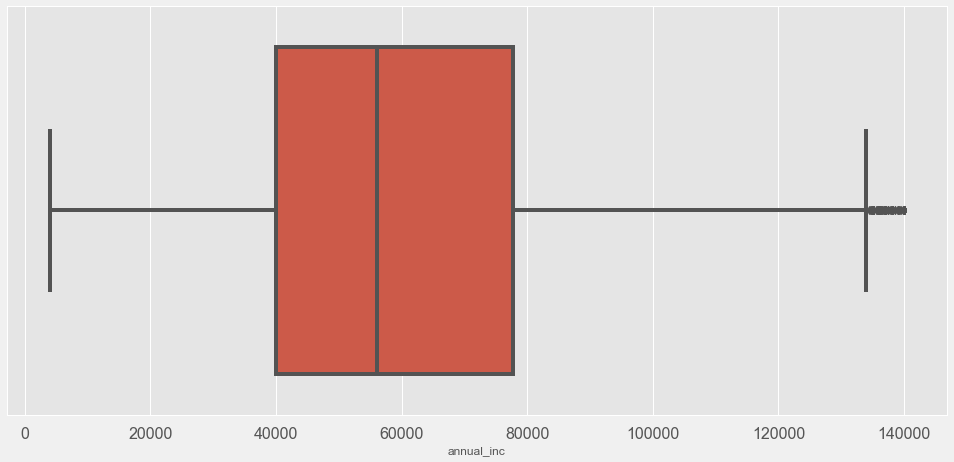

In [999]:
# Drawing Boxplot for Annual Income
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan_df.annual_inc)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The outliers have been removed that are above 95 percentile
    </span>    
</div>

##### Loan Amount

In [1000]:
#Getting quantitative variables with describe for loan amount
loan_df['loan_amnt'].describe()

count    36642.000000
mean     10681.045658
std       7047.619569
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [1001]:
quant_info = loan_df["loan_amnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

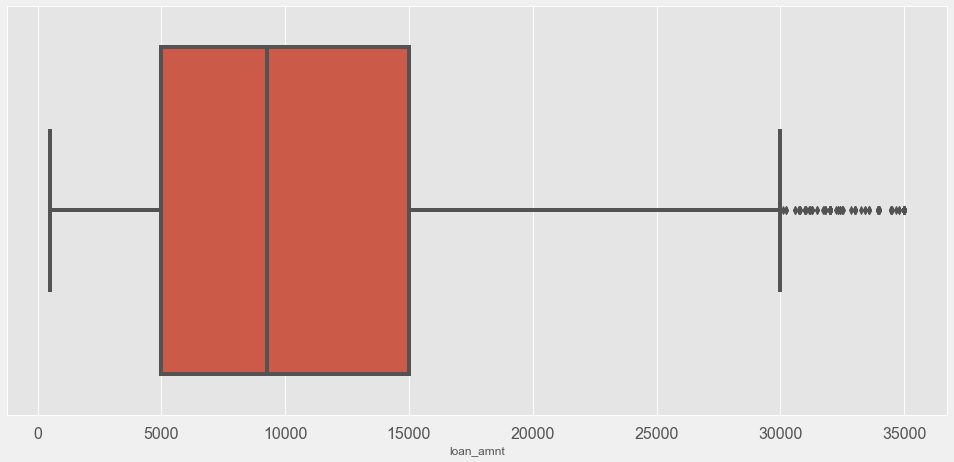

In [1002]:
#Drawing Box Plot for loan amount
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan_df.loan_amnt)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The columns exhibit a predominantly continuous distribution with a few outlier values. Hence, considering the distribution's predominantly continuous nature, there's no necessity to remove these outliers/extreme values from the aforementioned columns.
    </span>    
</div>

##### Total Payment

In [1003]:
#Getting quantitative variables with describe for total payment
loan_df["total_pymnt"].describe()

count    36642.000000
mean     11440.185666
std       8407.104287
min          0.000000
25%       5413.353366
50%       9367.652235
75%      15458.570902
max      58563.679930
Name: total_pymnt, dtype: float64

In [1004]:
quant_info = loan_df["total_pymnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     9367.652235
0.75    15458.570902
0.90    23183.362207
0.95    28540.943201
0.97    31507.386925
0.98    34445.576803
0.99    39300.892125
Name: total_pymnt, dtype: float64

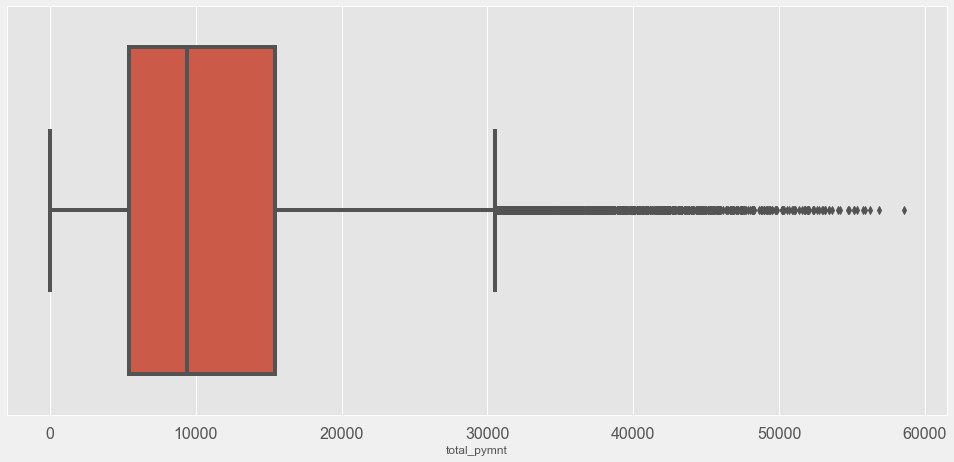

In [1005]:
# Drawing Boxplot for Total Payment
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan_df.total_pymnt)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The columns exhibit a predominantly continuous distribution with a few outlier values. Hence, considering the distribution's predominantly continuous nature, there's no necessity to remove these outliers/extreme values from the aforementioned columns.
    </span>    
</div>

##### Interest Rate

In [1006]:
#Basic Statistics with Interest Rate

loan_df['int_rate'].describe()

count    36642.000000
mean        11.887884
std          3.667161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [1007]:
quant_info = loan_df["int_rate"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50    11.71
0.75    14.27
0.90    16.77
0.95    18.25
0.97    19.29
0.98    19.91
0.99    20.89
Name: int_rate, dtype: float64

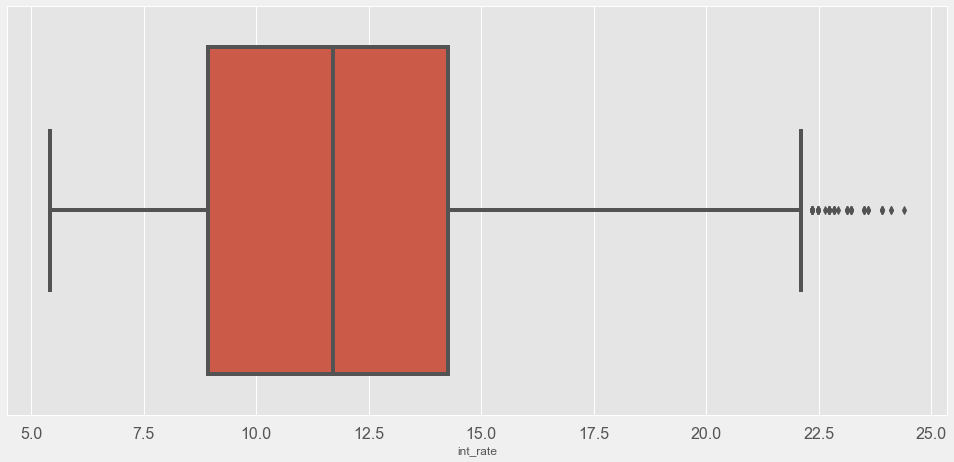

In [1008]:
# Drawing Boxplot for Interest Rate
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan_df.int_rate)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The columns exhibit a predominantly continuous distribution with a few outlier values. Hence, considering the distribution's predominantly continuous nature, there's no necessity to remove these outliers/extreme values from the aforementioned columns.
    </span>    
</div>

In [1009]:
# Checking the percentage of null values in each column
round(loan_df.isnull().sum() / loan_df.shape[0] * 100.00,2)

id                         0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveri

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>All the columns have null values which is less than 1%
    </span>    
</div>

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Analysis
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy:</b> 
        <p>The data analysis flow has been planned in following way :</p>
        <ul>
            <li>Imbalance in Data</li>
            <li>Categorical Data Analysis</li>
            <ul>
                <li>Categorical segmented Univariate Analysis</li>
                <li>Categorical Bi/Multivariate analysis</li>
            </ul>
            <li>Numeric Data Analysis</li>
            <ul>
                <li>Bi-furcation of databased based on TARGET data</li>
                <li>Correlation Matrix</li>
                <li>Numerical segmented Univariate Analysis</li>
                <li>Numerical Bi/Multivariate analysis</li>
            </ul> 
        </ul>
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.1 Imbalance Analysis
            </span>   
        </font>    
</h3>

In [1016]:
imbalance = loan_df['loan_status'].value_counts().reset_index()

In [1017]:
loan_df.loan_status.unique()

['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']

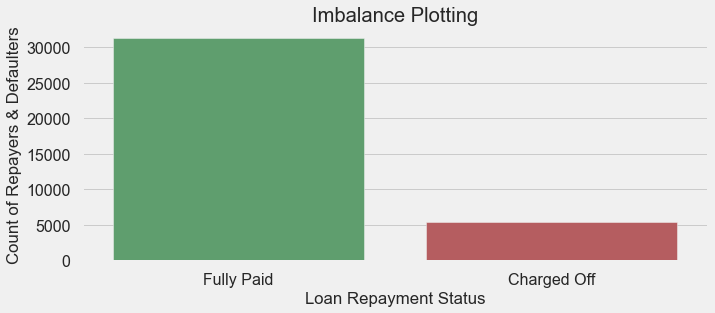

In [1018]:
plt.figure(figsize=(10,4))
x= ['Fully Paid','Charged Off']
sns.barplot(x,"loan_status",data = imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The following plot shows that around 14% loans were charged off out of the total loans issued
    </span>    
</div>

In [1019]:
count_0 = imbalance.iloc[0]["loan_status"]
count_1 = imbalance.iloc[1]["loan_status"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)
print('Ratios of imbalance in percentage with respect to Fully-Paid and Charged-Off datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Fully-Paid and Charged-Off datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Fully-Paid and Charged-Off datas are: 85.22 and 14.78
Ratios of imbalance in relative with respect to Fully-Paid and Charged-Off datas is 5.77 : 1 (approx)


<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.2 Creating Bins
            </span>   
        </font>    
</h3>

In [1020]:
#Creating Bins for further analysis
#Creating categories for loan amounts for further analysis
loan_df['loan_amnt_categories']=pd.cut(loan_df['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

#Creating categories for annual incomes for further analysis
loan_df['annual_inc_categories']=pd.cut(loan_df['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for further analysis
loan_df['interest_rate_categories']=pd.cut(loan_df['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for further analysis
loan_df['dti_categories']=pd.cut(loan_df['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

In [1021]:
#Converting Categorical columns from Object to categorical 
Catgorical_col_p = ['term','grade','sub_grade',
                    'home_ownership','verification_status','loan_status','purpose',
                   'addr_state','annual_inc_categories','loan_amnt_categories','interest_rate_categories','dti_categories']

for col in Catgorical_col_p:
    loan_df[col] =pd.Categorical(loan_df[col])

In [1022]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36642 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        36642 non-null  int64   
 1   loan_amnt                 36642 non-null  int64   
 2   funded_amnt               36642 non-null  int64   
 3   funded_amnt_inv           36642 non-null  float64 
 4   term                      36642 non-null  category
 5   int_rate                  36642 non-null  float64 
 6   installment               36642 non-null  float64 
 7   grade                     36642 non-null  category
 8   sub_grade                 36642 non-null  category
 9   emp_length                36642 non-null  int64   
 10  home_ownership            36642 non-null  category
 11  annual_inc                36642 non-null  float64 
 12  verification_status       36642 non-null  category
 13  issue_d                   36642 non-null  obje

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.3 Plotting Functions
            </span>   
        </font>    
</h3>

Following are the common functions customized to perform uniform anaysis that is called for all plots:

#### univariate_categorical

This Python function is designed for conducting univariate categorical analysis on a loan dataset. It facilitates the creation of two subplots within a single figure:

1. The first subplot displays a count plot of a specified categorical column in relation to the 'loan_status,' providing insights into the distribution of loan statuses within the chosen category.
2. The second subplot visualizes the percentage of defaulters within the same categorical column, offering a clear perspective on the proportion of borrowers who have defaulted.

This function is a valuable tool for exploring the impact of categorical variables on loan statuses and identifying potential patterns or trends.

In [1024]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    # Calculate the percentage of loan_status (charged off) per category value
    cat_perc = loan_df.groupby([feature, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    cat_perc['Total'] = cat_perc['Charged Off'] + cat_perc['Fully Paid']
    cat_perc['ChargedOff_Proportion']=cat_perc['Charged Off']/cat_perc['Total']*100
    cat_perc.sort_values(by='ChargedOff_Proportion', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=loan_df,
                    hue ="loan_status",
                    order=cat_perc[feature],
                    palette='crest')
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='ChargedOff_Proportion', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

#### fequency_and_box_plot

The function, fequency_and_box_plot, is designed to generate two side-by-side subplots within a figure using Matplotlib and Seaborn libraries. This function is intended to display a frequency plot (distribution plot) and a box plot for a specified feature in the dataset.

**Subplot 1 (Position 1):** A frequency plot (Seaborn's distplot()) is created using the data in the specified 'feature' column. This plot displays the distribution of the data along with 'rugs' indicating individual data points. The title, x-axis label, and y-axis label are set for this plot.

**Subplot 2 (Position 2):** A box plot (Seaborn's boxplot()) is created for the same 'feature' column. This plot displays the statistical summary of the data, showing the median, quartiles, and outliers. It also has a title and a y-axis label.

In [1025]:
def fequency_and_box_plot(data, feature, figsize):
    plt.figure(figsize=figsize)
    plt.subplot(2, 2, 1)
    dist_plot = sns.distplot(data[feature], rug=True)
    dist_plot.set(title='Frequency Plot ' + feature)
    dist_plot.set_xlabel(feature)
    dist_plot.set_ylabel('frequency')
    
    plt.subplot(2, 2, 2)
    dist_plot = sns.boxplot(y=data[feature])
    dist_plot.set(title='Box plot for ' + feature)
    dist_plot.set_ylabel(feature)

    plt.show()

#### bivariate_violin

The function, bivariate_box, is designed to create a bivariate box plot using Seaborn and Matplotlib libraries. This function aims to display the distribution of a numerical variable (y-axis) across different categories of a categorical variable (x-axis).

In [1033]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_box(x,y,df,figsize, title):
    
    plt.figure(figsize=figsize)
    ax = sns.boxplot(x=x,
                  y=y,
                  data=df, 
                  palette = 'crest')     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    ax.set_ylabel(y, fontsize=14, color='blue') 
    ax.set_xlabel(x, fontsize=14, color='blue') 
    ax.set_title(title, fontsize=15, color='blue') 
    plt.show()

#### bivariate_violin

The function, bivariate_violin, is designed to create a bivariate violin plot using Seaborn and Matplotlib libraries. This function displays the distribution of a numerical variable (y-axis) across different categories of a categorical variable (x-axis).

In [1028]:
def bivariate_violin(x, y, df, figsize, title):
    plt.figure(figsize=figsize)

    # Create a bivariate violin plot
    ax = sns.violinplot(x=x, y=y, data=df, palette='rainbow')

    # Define aesthetics (labels and title) of the plot
    ax.set_ylabel(y, fontsize=14, color='blue')  # Set the y-axis label
    ax.set_xlabel(x, fontsize=14, color='blue')  # Set the x-axis label
    ax.set_title(title, fontsize=15, color='blue')  # Set the title of the plot

    plt.show()  # Display the plot

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.4 Categorical and Segmented Variable Analysis
            </span>   
        </font>    
</h3>

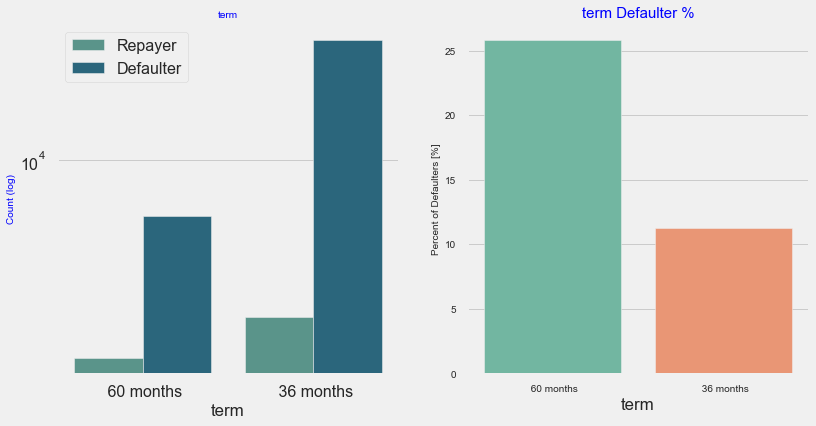

In [859]:
univariate_categorical('term', True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Term: Loans with 60 months tenure are just a small fraction from the total number of loans; in the same time, a larger amount of 60 months tenure loans, comparing with their frequency, are not repaid.
    </span>    
</div>

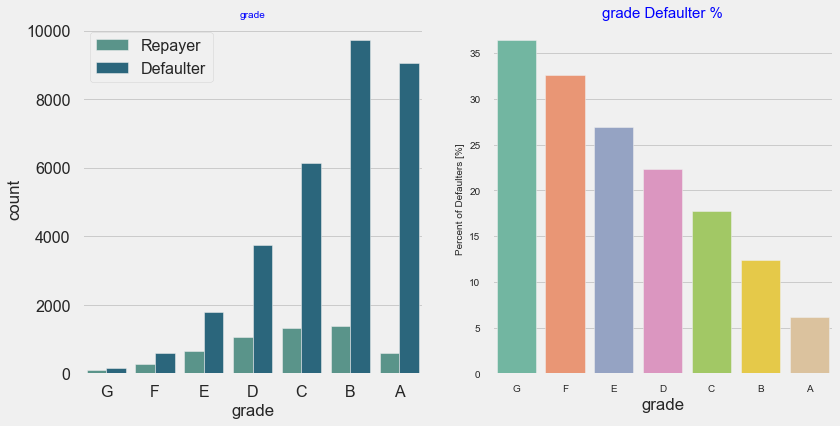

In [860]:
univariate_categorical('grade')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Grade: Loans with graders: A and B are in large fraction from the total number of loans.Based on the percentage of defaulted credits, grade G, F, and E have a higher chance of not returning their loans, comparing with other grades
    </span>    
</div>

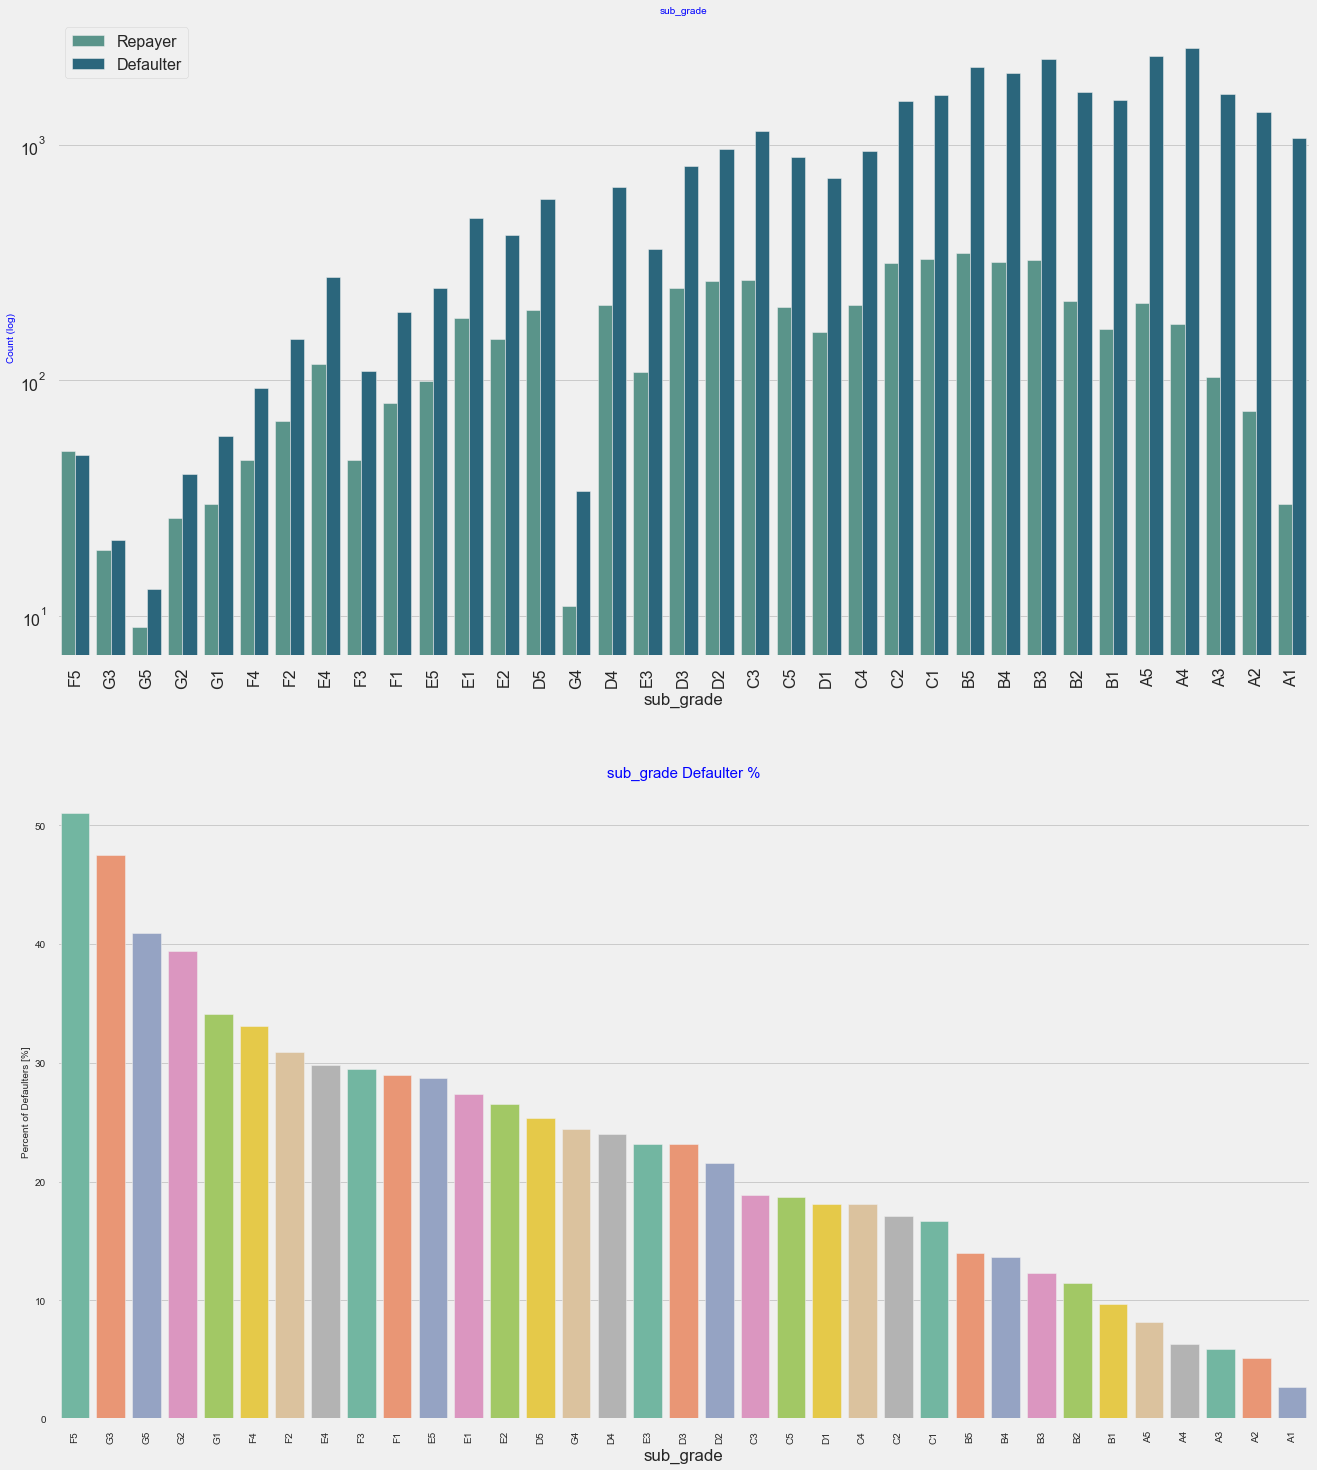

In [861]:
univariate_categorical('sub_grade', True, True, False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Sub Grade: Loans with sub grades: F5,G3, G5, G2, G1 has less change to get repaid.
    </span>    
</div>

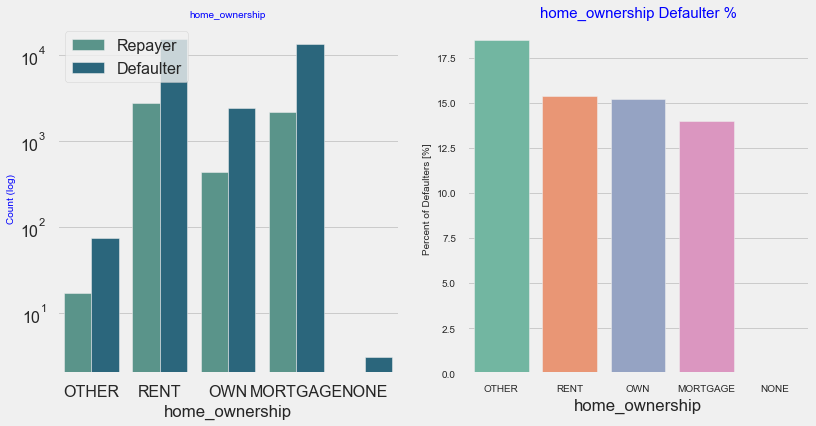

In [862]:
univariate_categorical('home_ownership', True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Home Ownership: Applicants whose home are Rented, Owned, and Mortgage comprises of most of the loan applications. But, the most of the number of defaulters belong to the category "Other", but there is no significant difference between the defaulters.
    </span>    
</div>

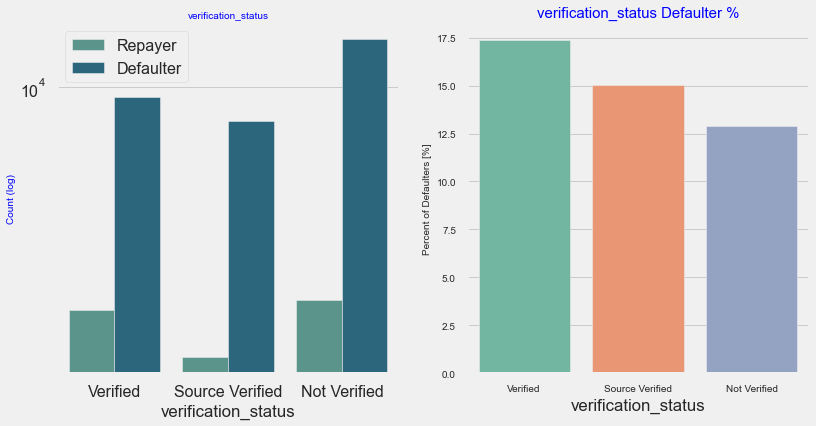

In [863]:
univariate_categorical('verification_status', True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Verification Status: Most number of loan applied falls under the category "not verified". The applicants whose income has been verified is more likely to default. But there is not a sifnificant difference between Verified and Source verified. Also, Not verified applicants is more likely to repay the loan
    </span>    
</div>

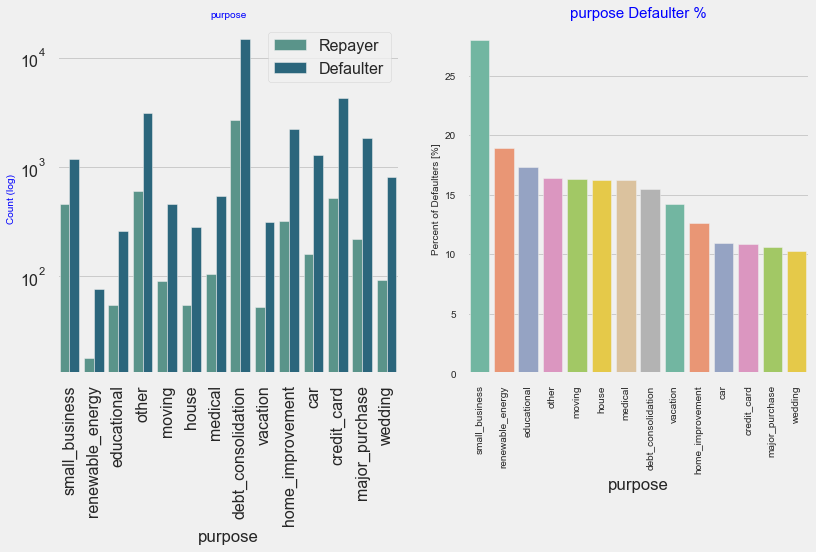

In [864]:
univariate_categorical('purpose', True, True, True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Purpose: The top 5 purposes for which the loan has been applied are debt_consolidation, small business, credit card, home improvement, and major purchases. But, small business owneres are more likely to default followed by renewable_energy and educational.
    </span>    
</div>

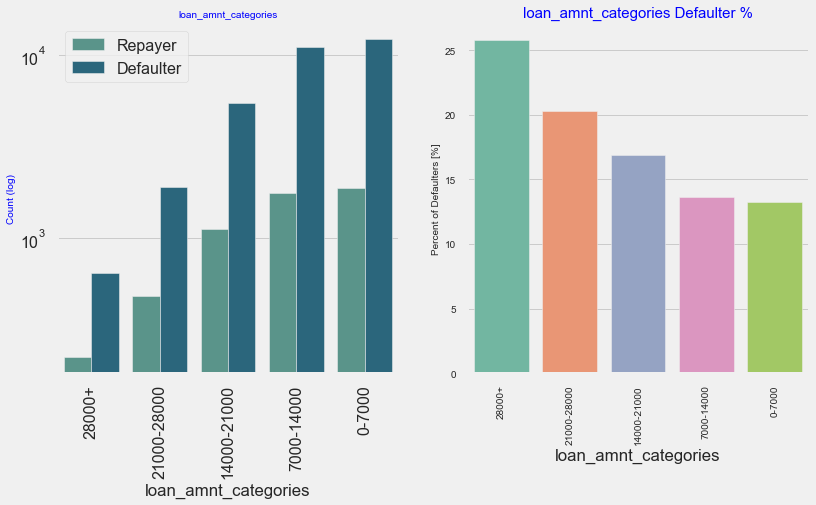

In [865]:
univariate_categorical('loan_amnt_categories', True, True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Loan Amount: Most of the applicants has applied the loan ranging from 0 to 21k. Applicants who has applied for loan amount more than 28k is more likely to default with ~27% probability.
    </span>    
</div>

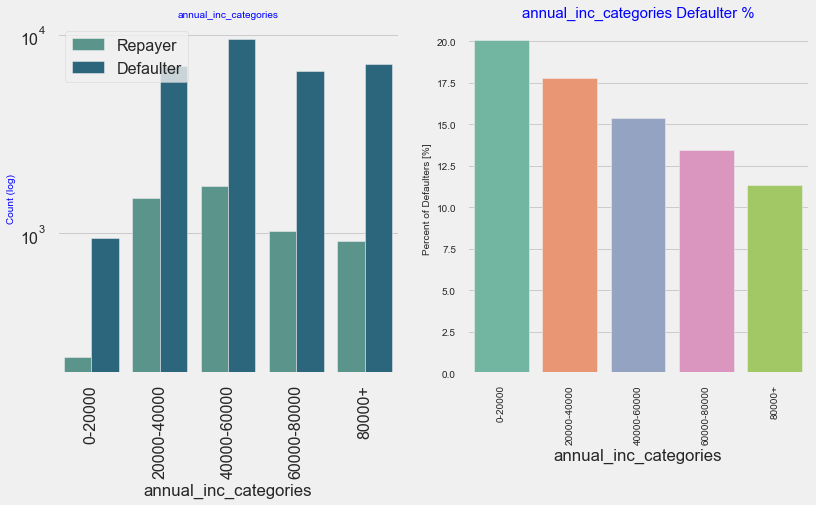

In [866]:
univariate_categorical('annual_inc_categories', True, True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Annual Income: Most of the applicants whose annual income is more than 20k has applied for the loan. And the probability of getting default is more for the applicants whose annual income ranges in between 0 to 40k.
    </span>    
</div>

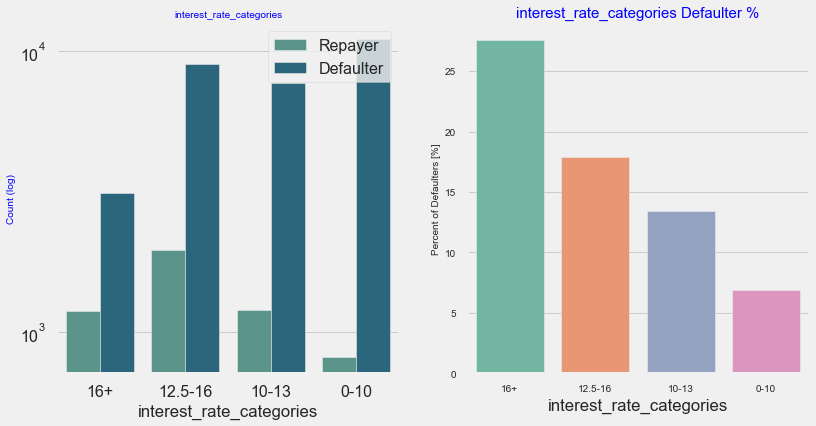

In [867]:
univariate_categorical('interest_rate_categories', True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Interest Rate: Most number of loan has been given with interest rate less than 16%. But, the most number of defaulters are ones whose loan's interest rate more than 16%.
    </span>    
</div>

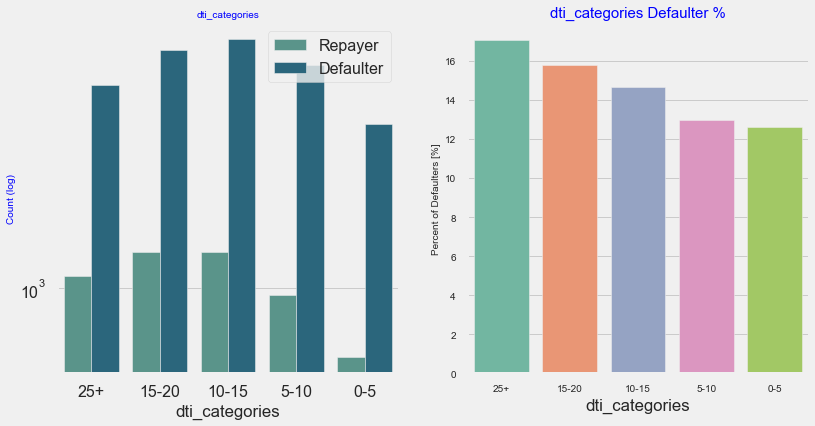

In [868]:
univariate_categorical('dti_categories', True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        DTI: Most number of loan has been given with DTI ranging from 5 to 20 But, the most number of defaulters are ones whose DTI is more than 25.
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.5 Numerical Variable Analysis
            </span>   
        </font>    
</h3>

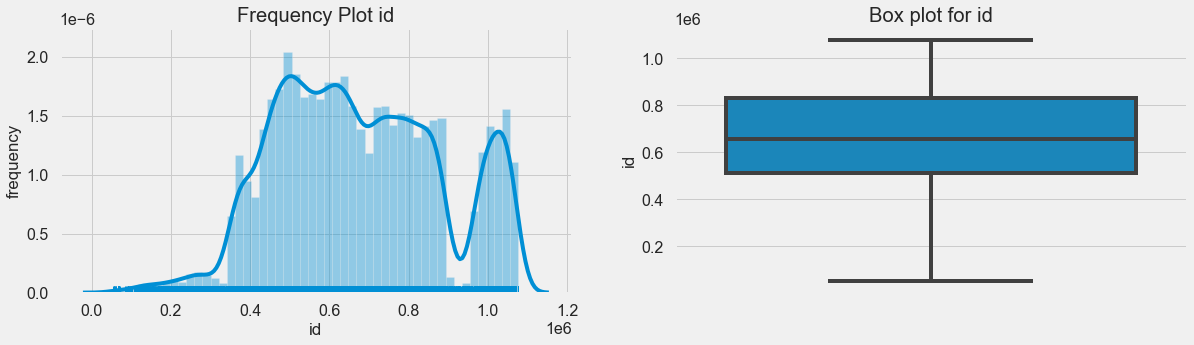

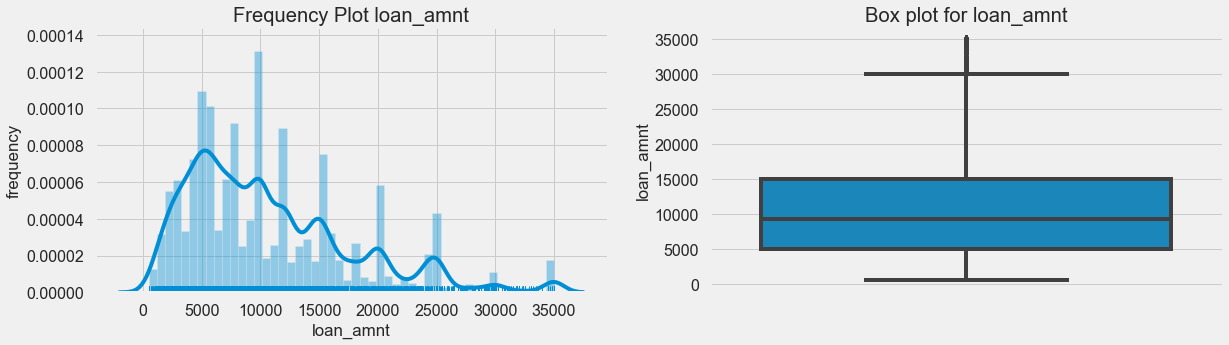

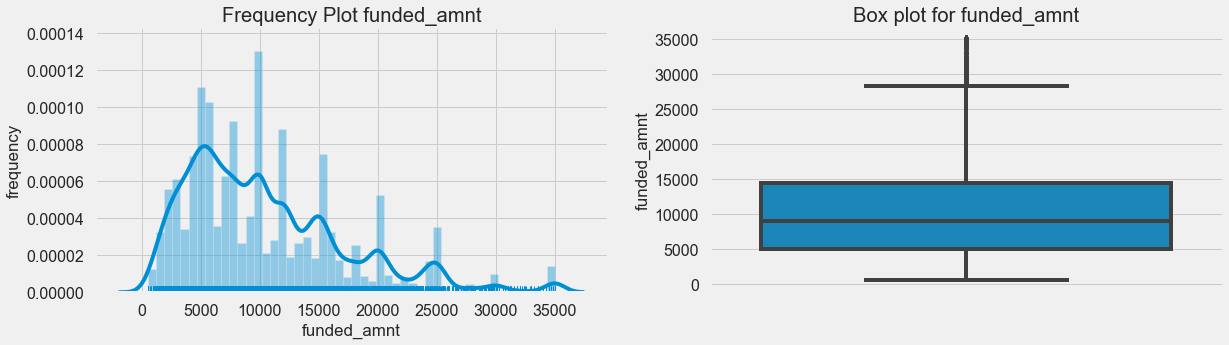

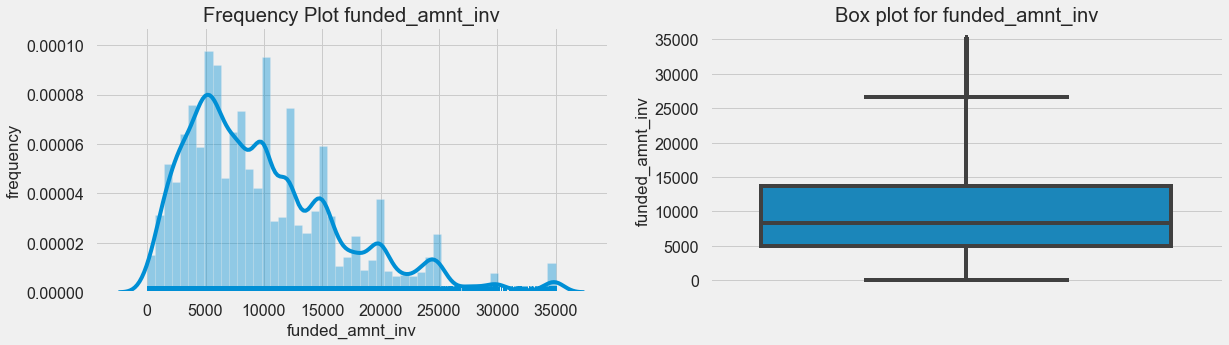

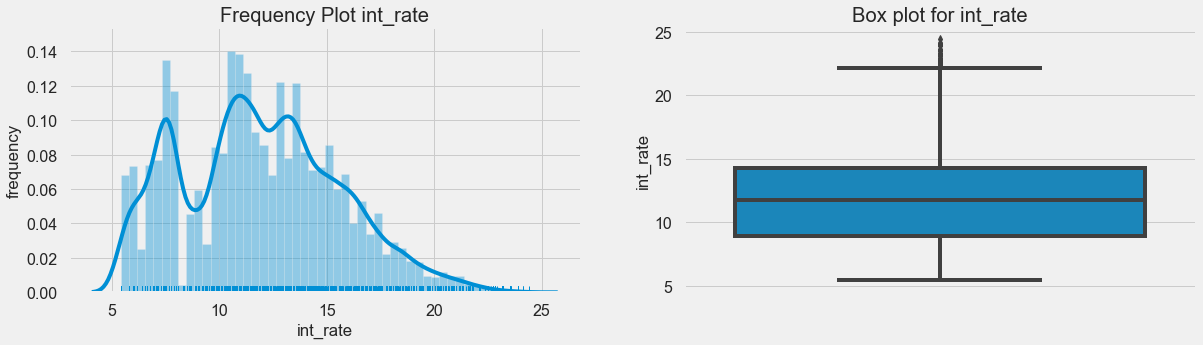

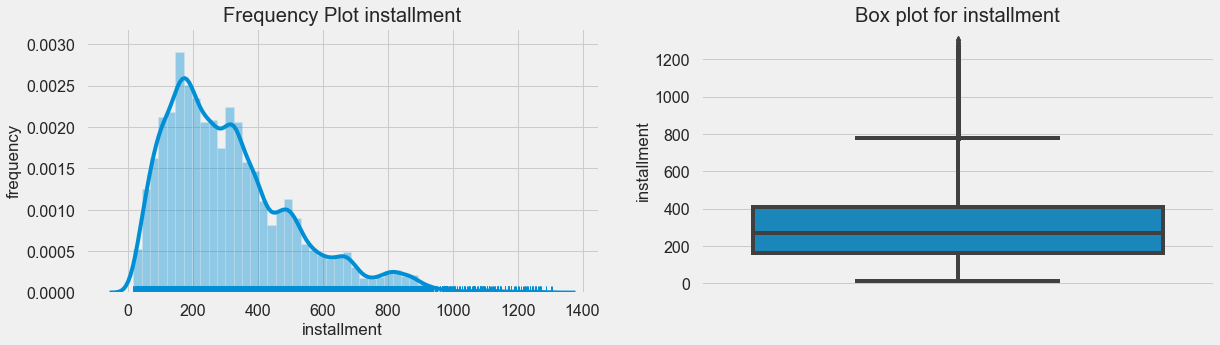

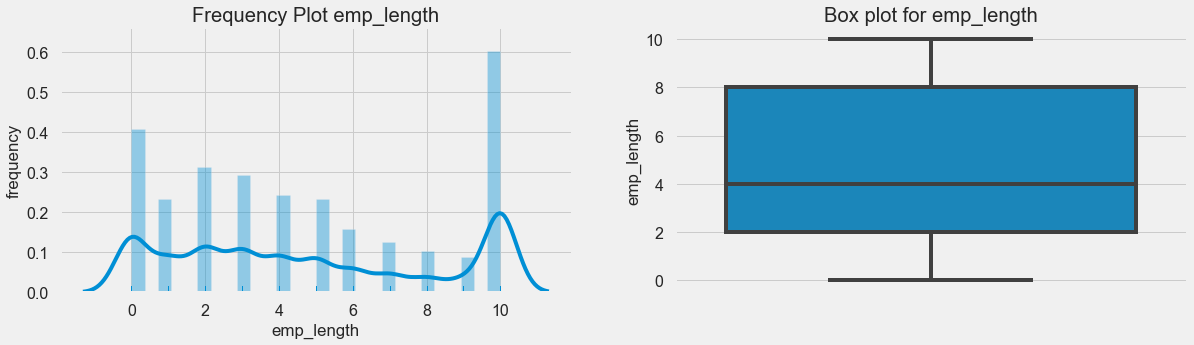

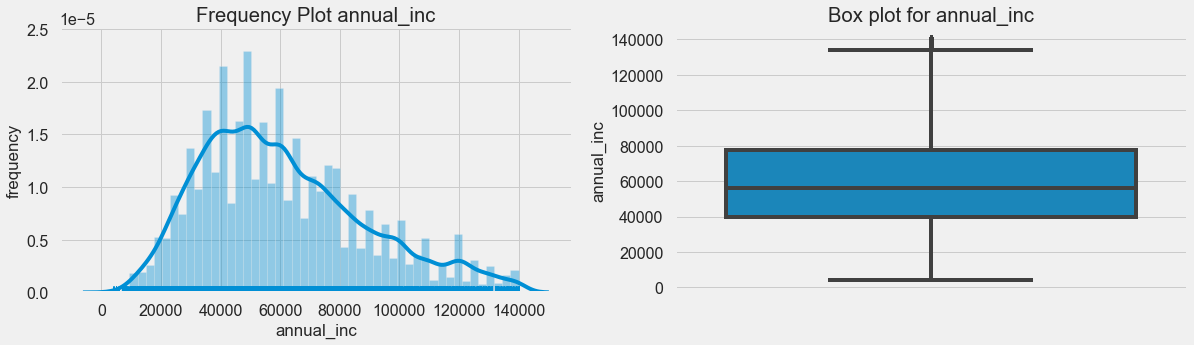

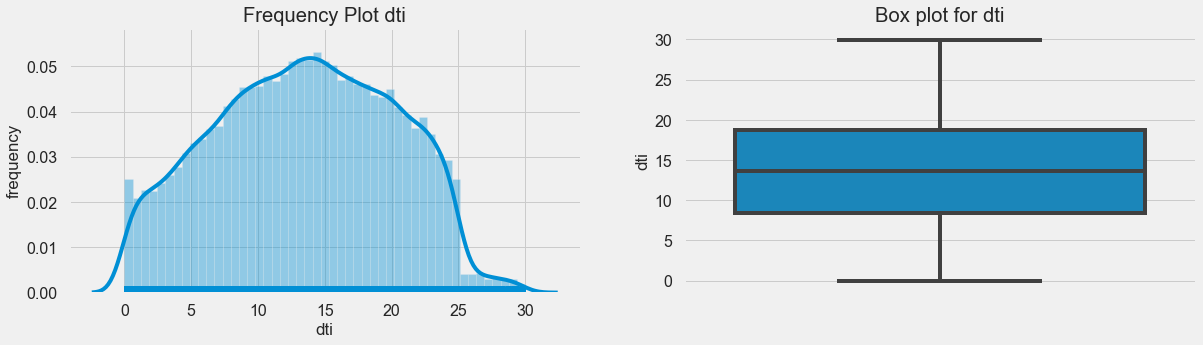

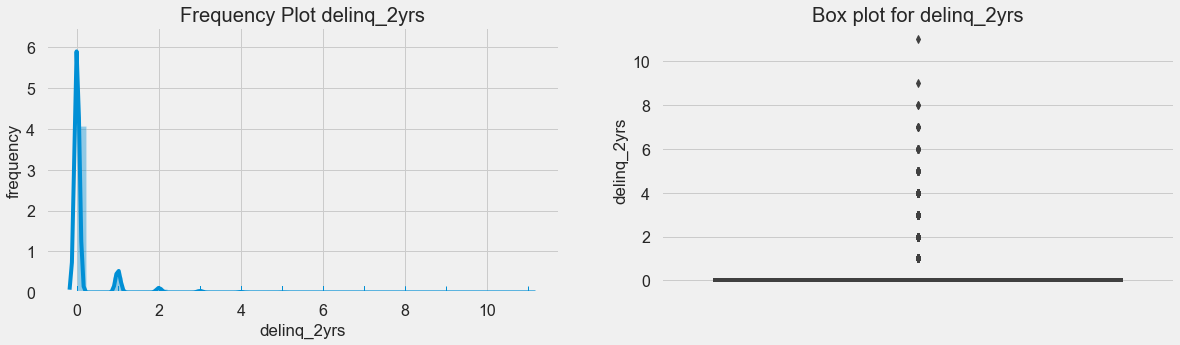

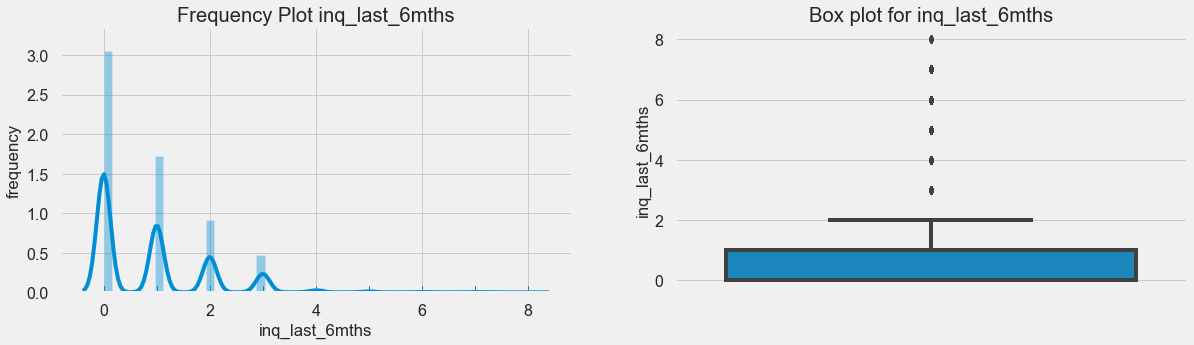

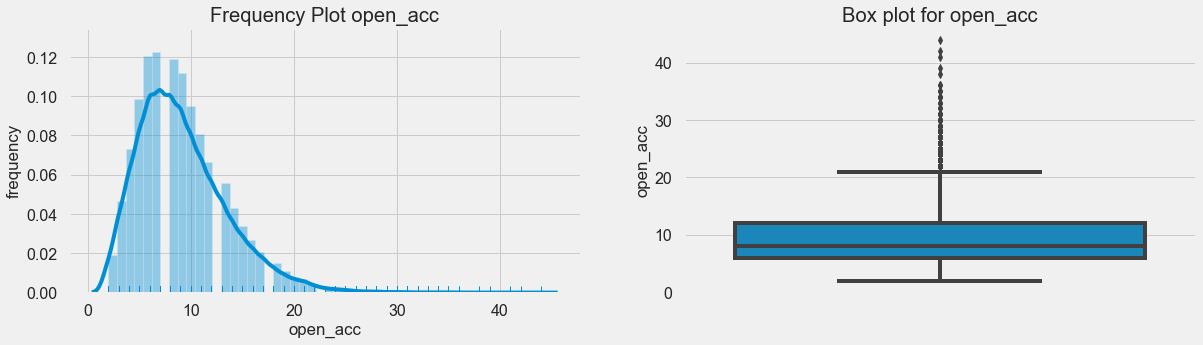

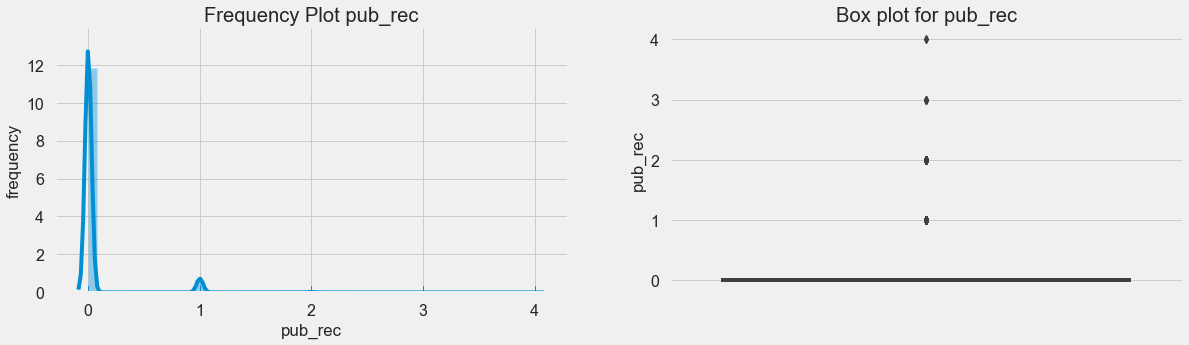

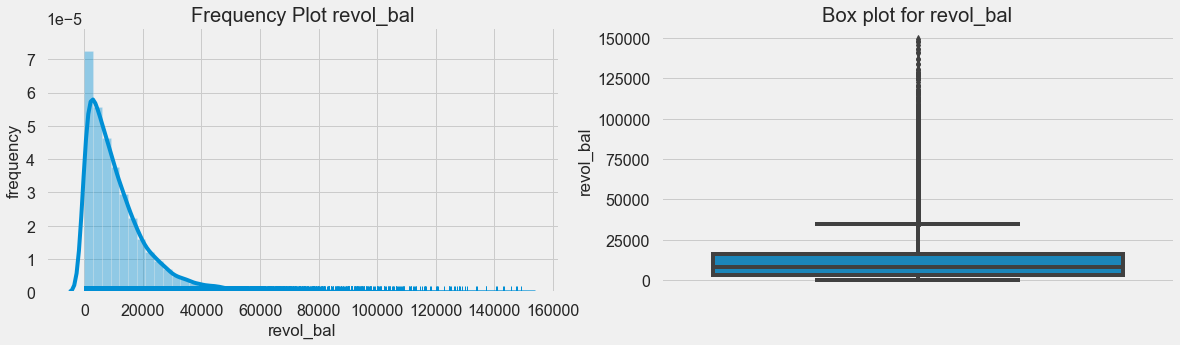

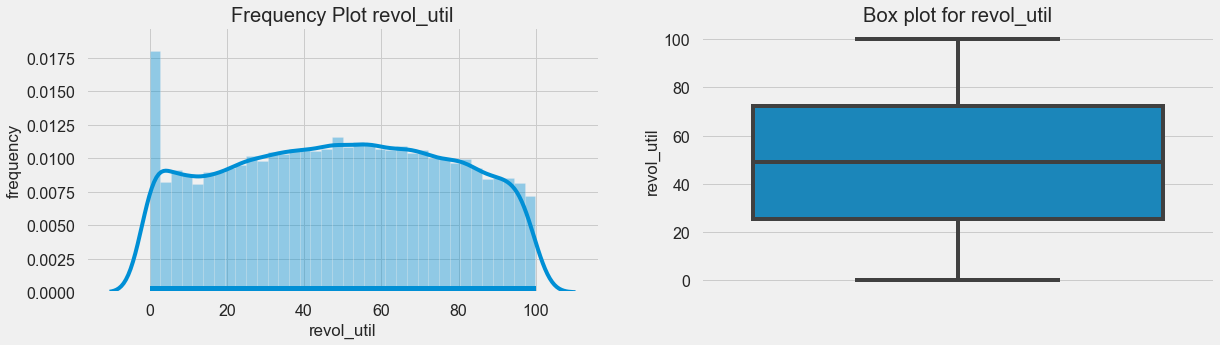

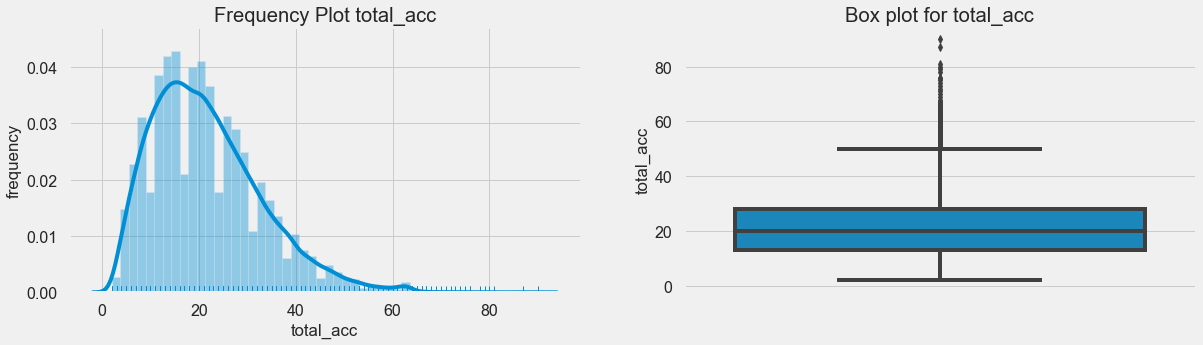

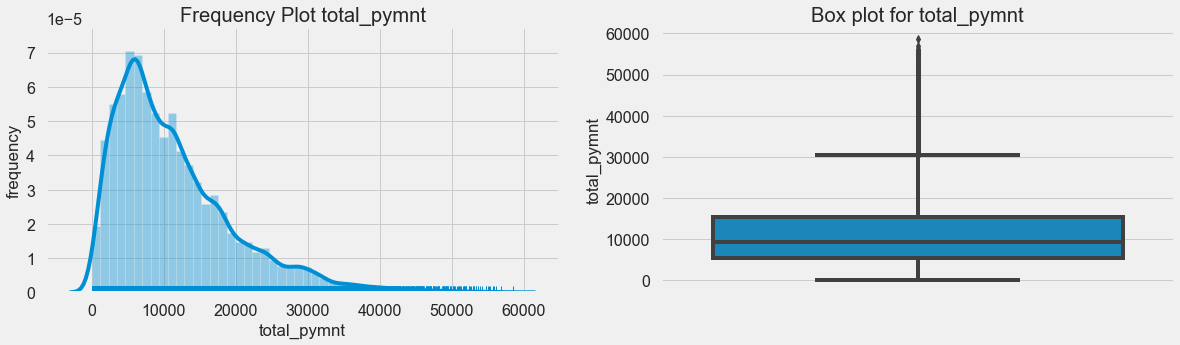

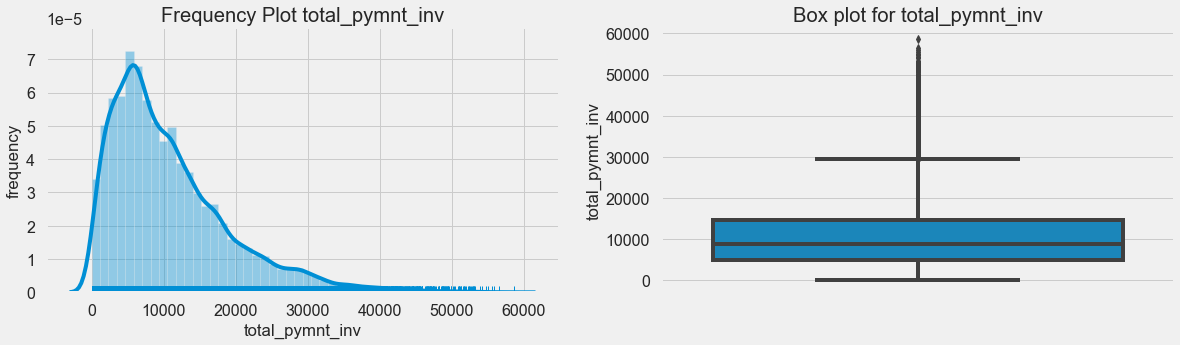

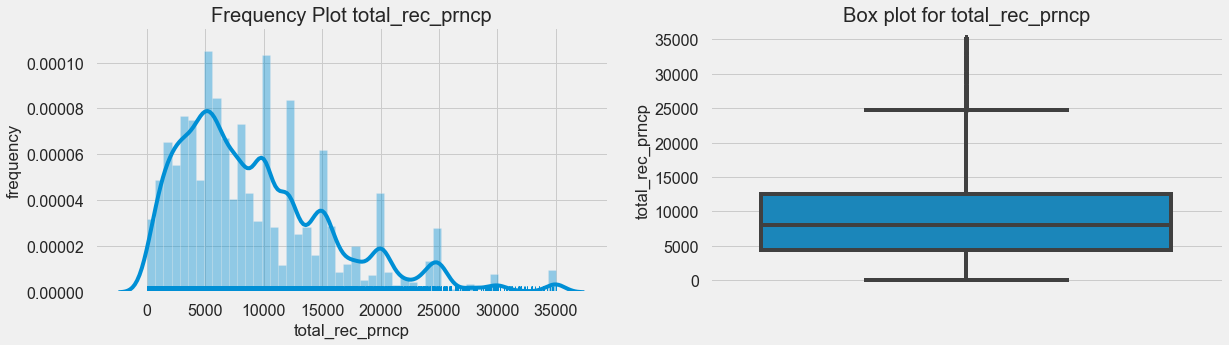

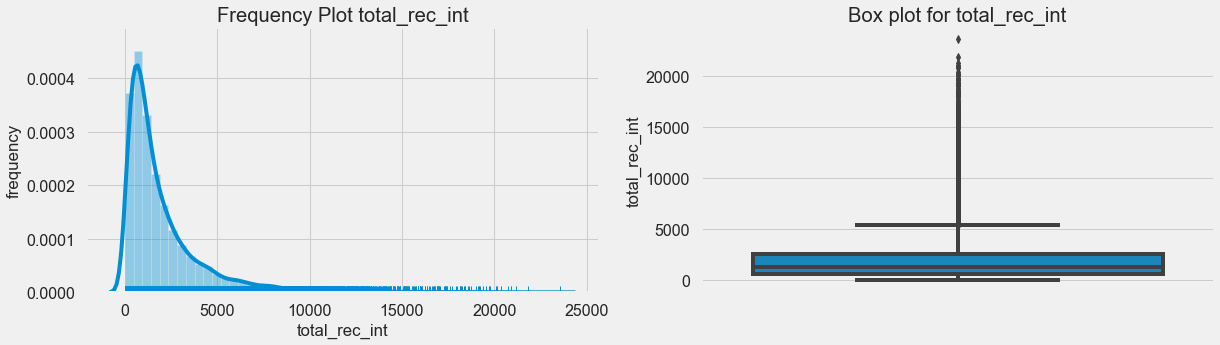

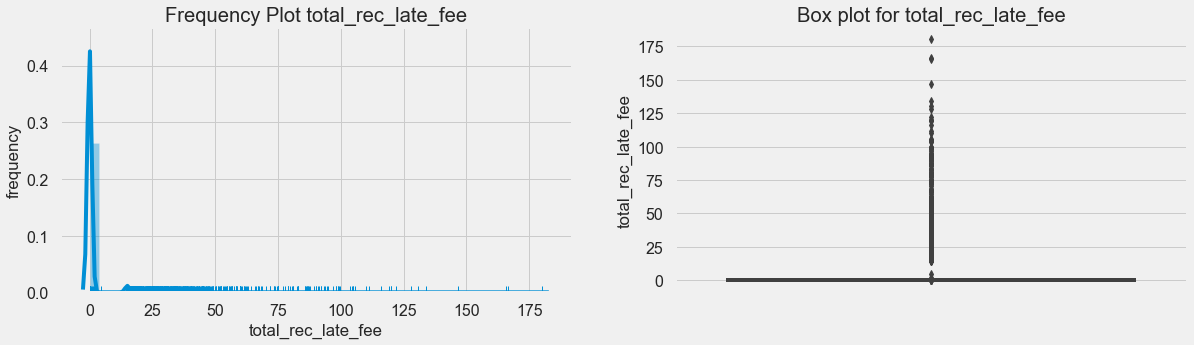

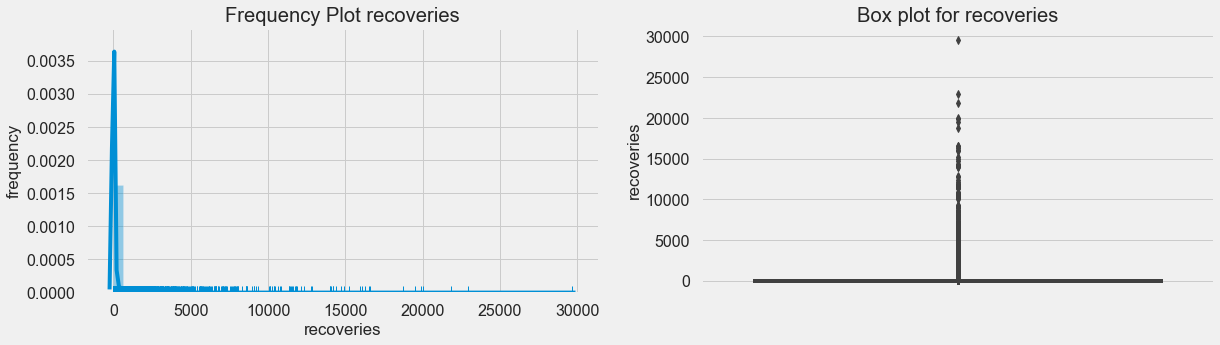

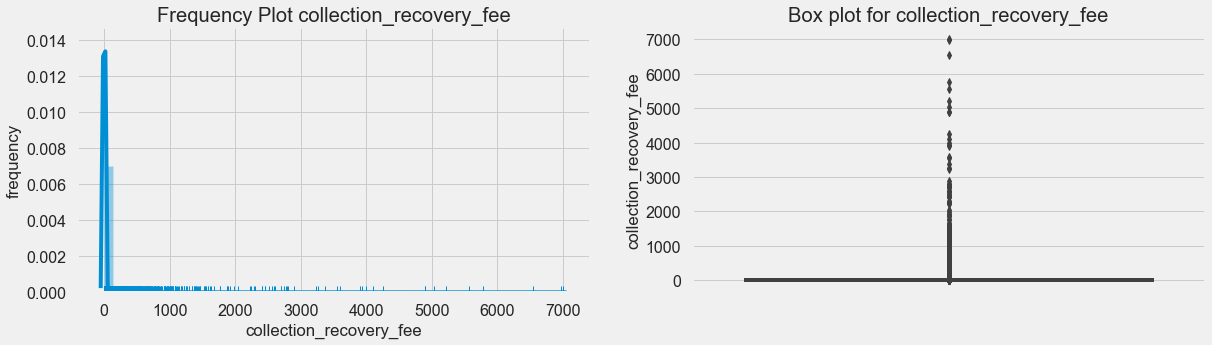

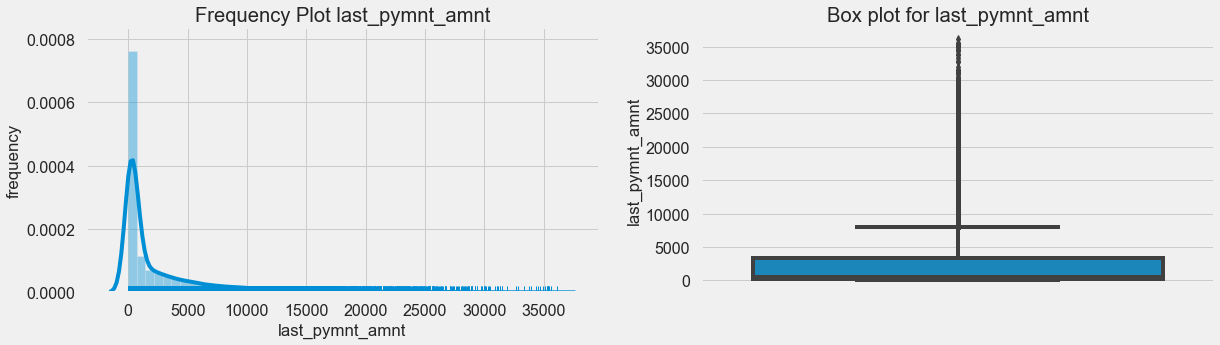

In [1029]:
# The provided code snippet iterates through the columns of a DataFrame (loan_df) and selects only those columns
# that have a data type of either 'int64' or 'float64'. For each column that meets this criterion, it calls
# the function fequency_and_box_plot to generate frequency and box plots for the numerical columns.
for col_name, col_data in loan_df.iteritems():
    col_dtype = col_data.dtype
    if col_dtype == 'int64' or col_dtype == 'float64':
        fequency_and_box_plot(loan_df, col_name, (18, 10))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Distribution of amounts for loan amount, funded amount, and funded by investor looks very much similar.<br>
        2. Most of the loan amounts are in the range 5k to 15k<br>
        3. Most of the interest rates are in the range 10%-15%<br>
        4. Most of the Annual Income are in the range 25000-75000<br>
        5. Most of the installments are in the range 100 to 400<br>
        6. Most of the applicants' annual income are in the range 40k to 60k<br>
        7. Most of the DTI ranges from 10% to 20%
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.6 Correlation Matrix
            </span>   
        </font>    
</h3>

#### Correlation Analysis-Bivariate Matrix

In [870]:
loan_correlation=loan_df.corr()

In [871]:
loan_correlation

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
id,1.000000,0.115436,0.126312,0.227905,0.050195,0.071186,0.091209,0.033070,0.093402,-0.008146,-0.042615,0.016077,-0.016078,0.003624,0.090902,0.037029,0.103211,0.188982,0.085746,0.117001,-0.061840,0.040874,-0.009078,0.141309
loan_amnt,0.115436,1.000000,0.981940,0.936901,0.291145,0.931488,0.157226,0.403358,0.090237,-0.036840,0.002489,0.166060,-0.044079,0.312939,0.070359,0.239093,0.876601,0.841517,0.838632,0.727049,0.041909,0.145113,0.075400,0.469349
funded_amnt,0.126312,0.981940,1.000000,0.954829,0.296134,0.957120,0.156766,0.399203,0.089438,-0.036438,0.003023,0.164063,-0.044756,0.304872,0.074548,0.233902,0.893239,0.858119,0.856444,0.735475,0.044297,0.147145,0.077610,0.474143
funded_amnt_inv,0.227905,0.936901,0.954829,1.000000,0.288743,0.902616,0.165194,0.382540,0.097037,-0.043039,-0.011870,0.151554,-0.046299,0.285374,0.078975,0.226421,0.868781,0.904222,0.830841,0.724377,0.023869,0.134316,0.062865,0.466431
int_rate,0.050195,0.291145,0.296134,0.288743,1.000000,0.269155,0.008820,0.053952,0.111587,0.155423,0.133662,-0.008005,0.103800,0.080722,0.469558,-0.064123,0.279973,0.274327,0.163261,0.516251,0.090042,0.126761,0.068004,0.165263
installment,0.071186,0.931488,0.957120,0.902616,0.269155,1.000000,0.130565,0.398460,0.079374,-0.024674,0.001498,0.160841,-0.040158,0.305269,0.102322,0.212512,0.853480,0.811120,0.841004,0.640784,0.052380,0.124057,0.075633,0.407925
emp_length,0.091209,0.157226,0.156766,0.165194,0.008820,0.130565,1.000000,0.213528,0.057098,0.013888,0.010099,0.099149,0.054733,0.159553,0.017922,0.205041,0.140505,0.148812,0.131638,0.124296,-0.015670,0.024953,0.003563,0.087674
annual_inc,0.033070,0.403358,0.399203,0.382540,0.053952,0.398460,0.213528,1.000000,-0.072526,0.030091,0.029882,0.265014,-0.008725,0.397680,0.046835,0.386327,0.382223,0.368131,0.382960,0.272730,0.002496,0.041053,0.021001,0.219926
dti,0.093402,0.090237,0.089438,0.097037,0.111587,0.079374,0.057098,-0.072526,1.000000,-0.031709,0.008408,0.298389,-0.006913,0.270878,0.277014,0.245962,0.086089,0.092098,0.064112,0.121338,-0.010948,0.027329,0.011386,0.025007
delinq_2yrs,-0.008146,-0.036840,-0.036438,-0.043039,0.155423,-0.024674,0.013888,0.030091,-0.031709,1.000000,0.009403,0.014333,0.007916,-0.060602,-0.041590,0.067247,-0.028517,-0.035360,-0.042925,0.017609,0.029940,0.011197,0.011877,-0.014161


#### Heatmap to show correlation amongst various variables

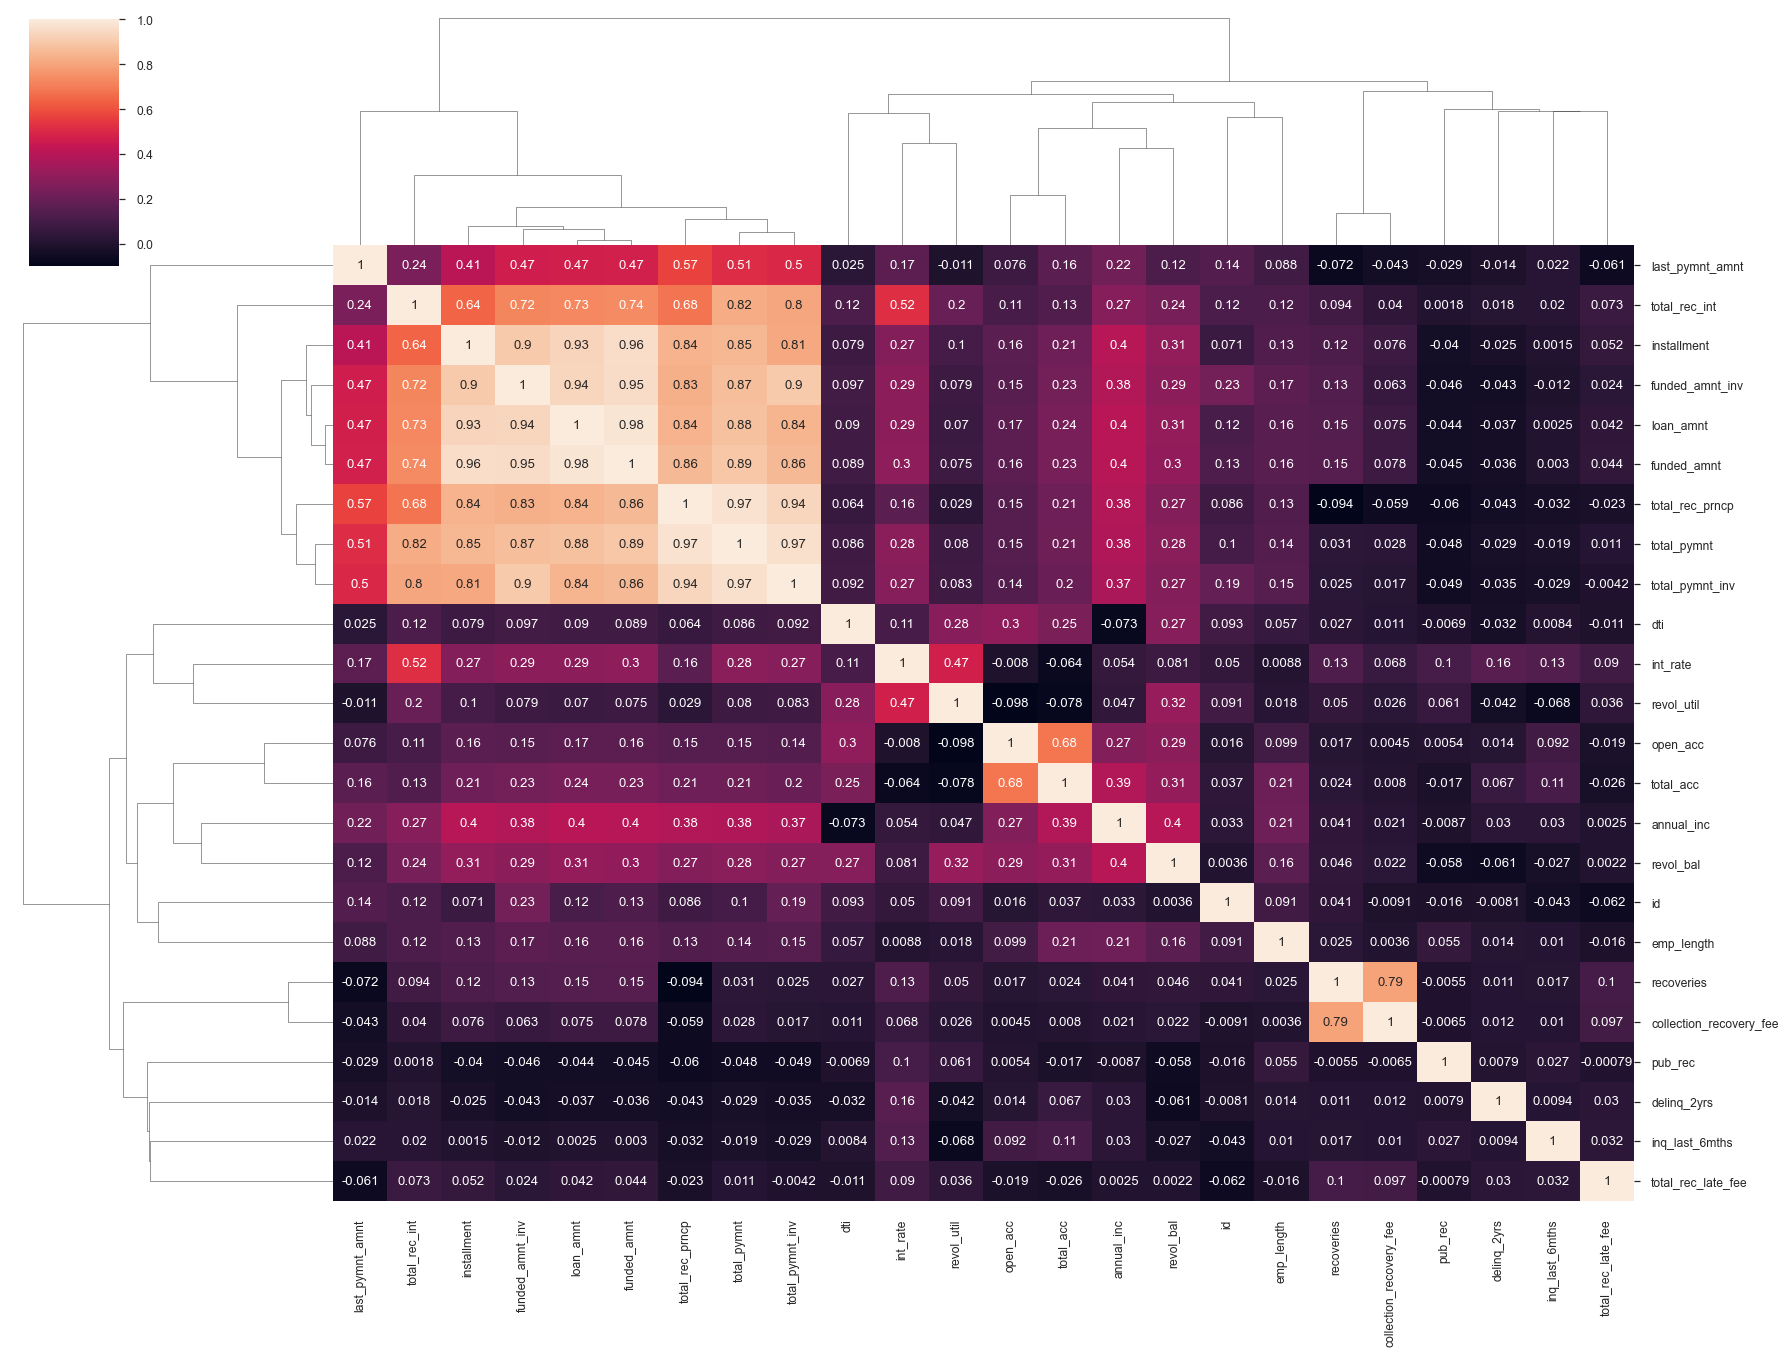

In [872]:
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(25,19))
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Annual Income to Debt To Income Ratio i.e. dti are negatively correlated<br>
        2. Loan Amount,Investor Amount and Funding Amount are strongly correlated<br>
        3. Positive correlation between Annual Income and employment years<br>
        4. Positive correlation between annual income and funded amount that means people with high income gets high funded amount<br>
        5. Positive correlation between annual income and total payment<br>
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.7 Bivariate Analysis
            </span>   
        </font>    
</h3>

In this section, we will conduct an analysis of the loan status concerning crucial columns that are likely to influence charged-off loans.

##### Purpose of Loan Vs Loan amount

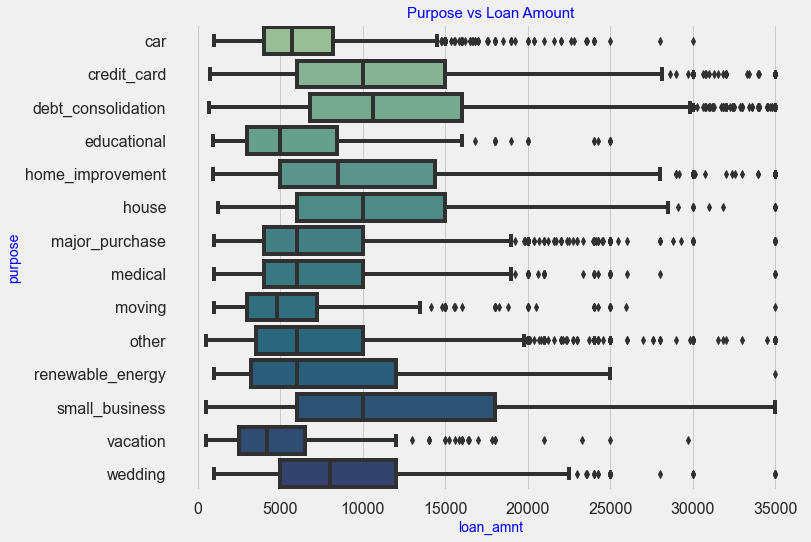

In [1034]:
bivariate_box('loan_amnt','purpose',loan_df,(10,8), 'Purpose vs Loan Amount')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.<br>
        2. Debt consolidation is second and Credit card comes 3rd.<br>
    </span>    
</div>

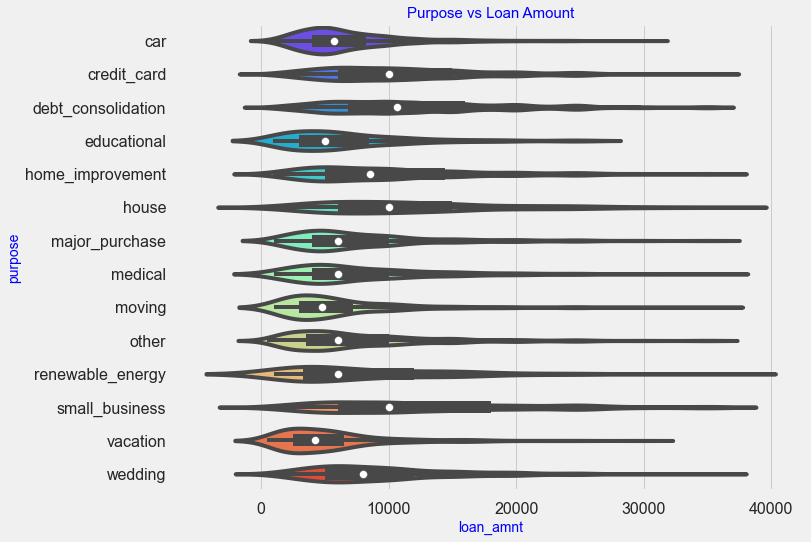

In [1035]:
bivariate_violin('loan_amnt','purpose',loan_df,(10,8), 'Purpose vs Loan Amount')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Loans intended for small business purposes, debt consolidation, and credit card utilization exhibit a relatively even distribution when compared to loans acquired for other purposes.
    </span>    
</div>

#### Term vs Interest Rate

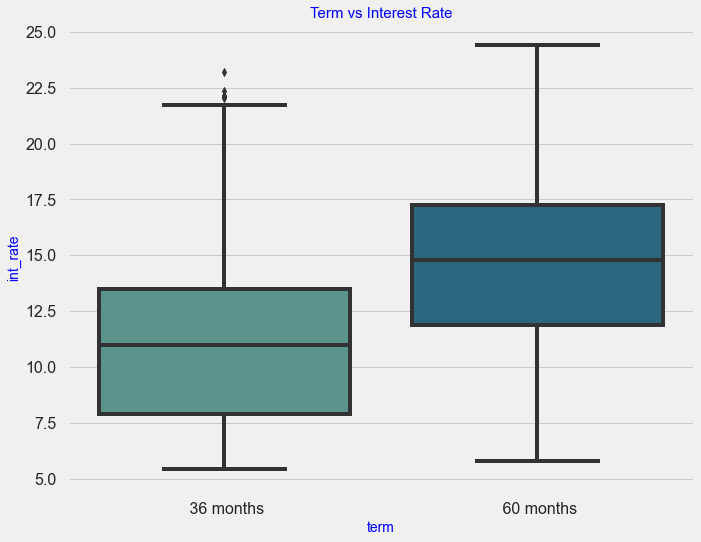

In [1036]:
bivariate_box('term','int_rate',loan_df,(10,8), 'Term vs Interest Rate')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. It is clear that avearge intrest rate is higher for 60 months loan term.<br>
        2. Most of the loans issued for longer term had higher intrest rates for repayement.<br>
    </span>    
</div>

#### Intereset Rate vs Purpose

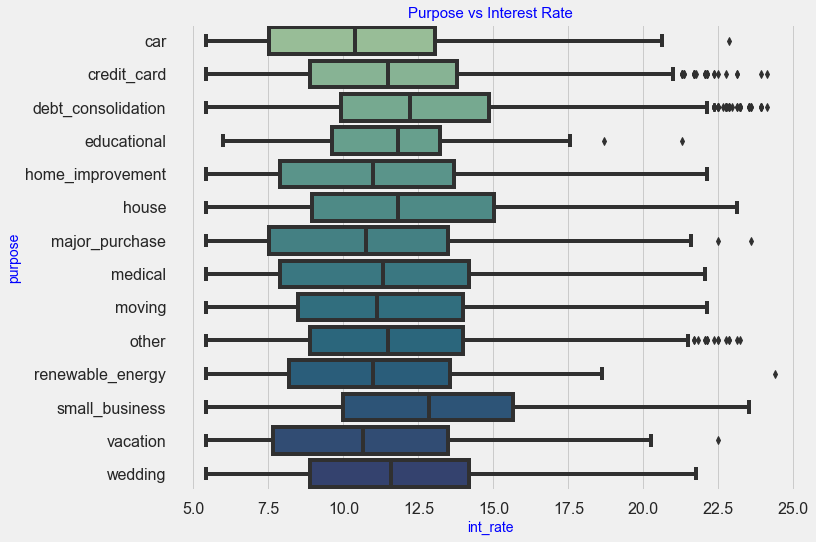

In [1037]:
bivariate_box('int_rate', 'purpose',loan_df,(10,8), 'Purpose vs Interest Rate')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Evidently, the average interest rate is notably higher for loans taken for small business purposes compared to other loan purposes.<br>
        2. Small business loans necessitated a higher interest rate for repayment compared to other loan purposes.<br>
        3. Debt consolidation stands as the second-highest category where borrowers encountered relatively higher interest rates in their loan repayment.
    </span>    
</div>

#### Grade vs Interest Rate

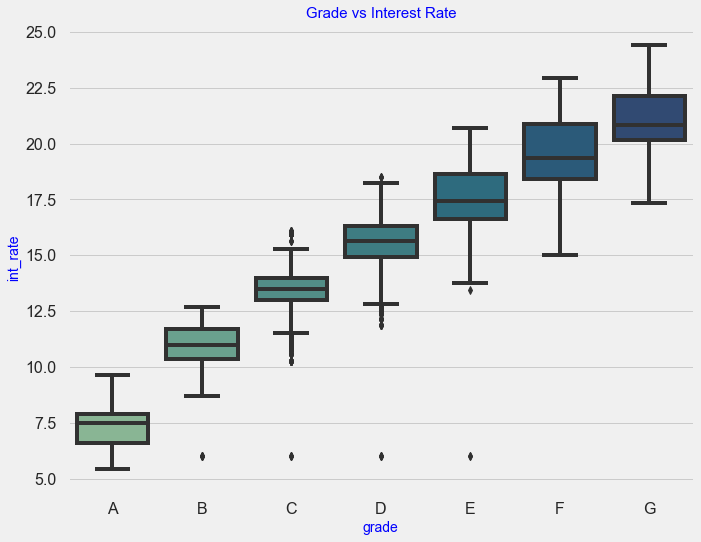

In [1038]:
bivariate_box('grade', 'int_rate',loan_df,(10,8), 'Grade vs Interest Rate')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. The 'A' grade represents the highest letter grade that a lender assigns to a borrower, typically denoting a strong creditworthiness or low risk for the lender.<br>
        2. There exists an inverse relationship between a borrower's credit grade and the interest rate offered on a loan; typically, a higher credit grade corresponds to a lower interest rate for the borrower.<br>
        3. The data demonstrates a clear upward trend in interest rates as the loan grade progresses from 'A' to 'F'.
    </span>    
</div>

#### Loan Amount vs Interest Rate

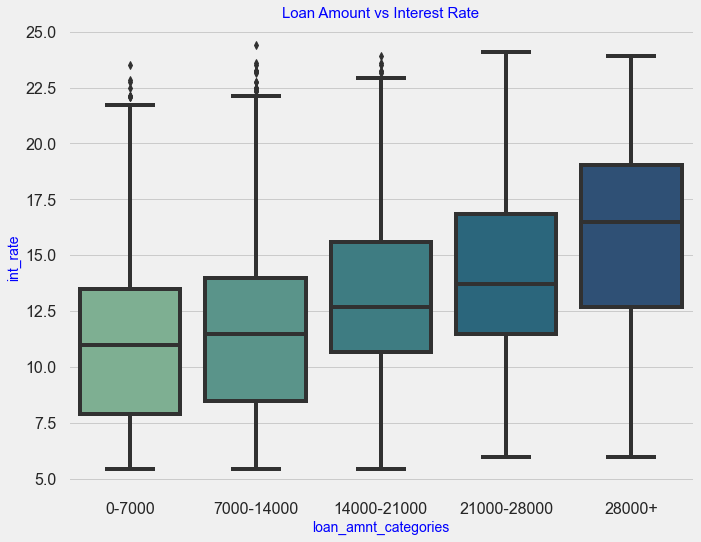

In [1039]:
bivariate_box('loan_amnt_categories', 'int_rate',loan_df,(10,8), 'Loan Amount vs Interest Rate')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Interest rate increases with the increase in the loan amount<br>
    </span>    
</div>

#### DTI vs Interest Rate

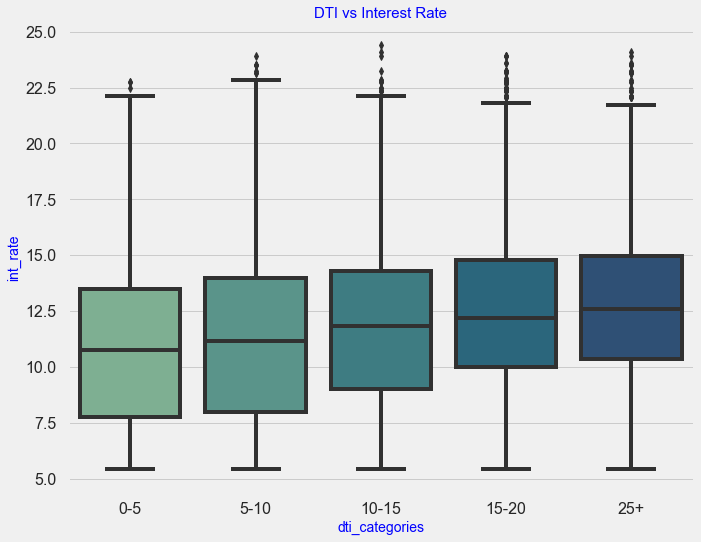

In [1040]:
bivariate_box('dti_categories', 'int_rate',loan_df,(10,8), 'DTI vs Interest Rate')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. We get lower interest rate when the DTI value is low<br>
        2. These does not seem to be significant difference in the loan amount, but we can see that there is a slight increase in the interest rate when the DTI increase
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.8 Multivariate Analysis
            </span>   
        </font>    
</h3>

A pair plot was generated, color-coded by loan status, showcasing density plots along the diagonal and formatted scatter plots to visualize the relationships between different variables in the dataset.

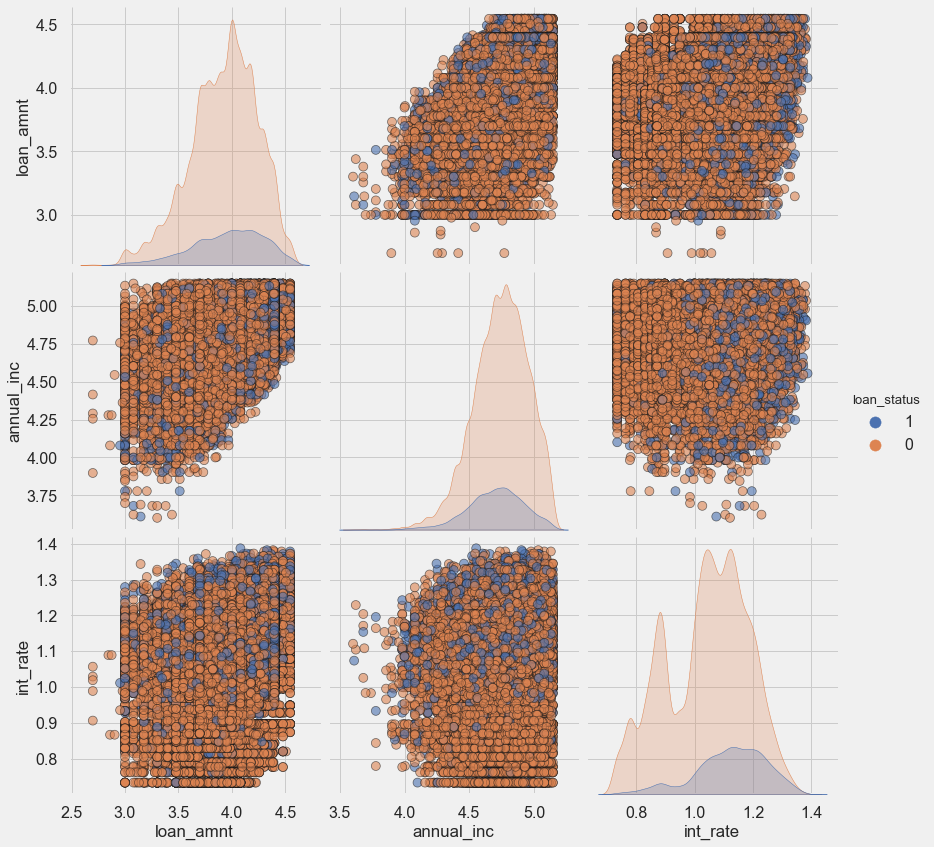

In [1041]:
sns.pairplot(loan_multivariate_dataframe, hue = 'loan_status', diag_kind = 'kde', palette = "deep",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        The charged-off ratio tends to be higher for loans with increased interest rates. Additionally, there's a slight correlation between higher loan amounts and higher annual income. Yearly trends indicate a rising count of charged-off loans. Moreover, an increase in loan amount corresponds to higher interest rates within the dataset.<br>
    </span>    
</div>

#### Let's check for the year 2007

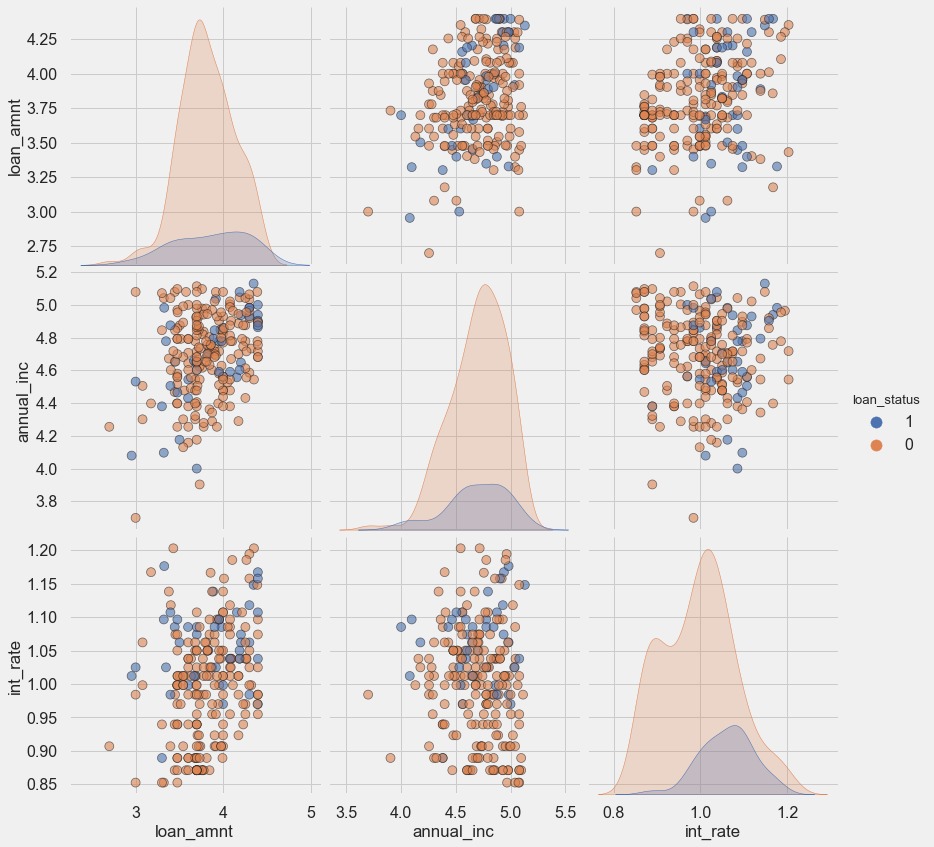

In [1045]:
sns.pairplot(loan_multivariate_dataframe[loan_multivariate_dataframe['issue_year'] == "2007"], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', 
             palette = "deep",
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, 
             size = 4);